# TH·ª∞C H√ÄNH: C√ÅC GI·∫¢I THU·∫¨T PH√ÇN LO·∫†I C∆† B·∫¢N

## 2.1. GI·∫¢I THU·∫¨T 1: C√ÇY QUY·∫æT ƒê·ªäNH V√Ä R·ª™NG C√ÇY

### 2.1.2. B√†i l√†m m·∫´u

#### B√†i to√°n 1: X√¢y d·ª±ng c√¢y quy·∫øt ƒë·ªãnh v√† r·ª´ng c√¢y v·ªõi d·ªØ li·ªáu l·∫•y t·ª´
https://www.kaggle.com/datasets/deceneu/default-of-credit-card-clients

***

##### Nhi·ªám v·ª• 1: X√¢y d·ª±ng c√¢y quy·∫øt ƒë·ªãnh b·∫±ng th∆∞ vi·ªán Scikit-Learn

**1. T·∫£i m·ªôt s·ªë package m√† ch√∫ng t√¥i s·ª≠ d·ª•ng v√† package graphviz, ƒë·ªÉ v·∫Ω c√¢y quy·∫øt ƒë·ªãnh**

In [1]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures
import graphviz #to visualize decision trees

**2. N·∫°p d·ªØ li·ªáu v√†o b·ªô nh·ªõ, ph√¢n t√≠ch v√† lo·∫°i b·ªè nh·ªØng features kh√¥ng li√™n quan ƒë·∫øn b√†i to√°n c·∫ßn gi·∫£i
quy·∫øt**

In [2]:
df = pd.read_csv('dataset/default_of_credit_card_clients.csv') #Load the cleaned data
features_response = df.columns.tolist() #Get a list of column names
#Make a list of columns to remove that aren't features or the response variable
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3',\
'PAY_4', 'PAY_5', 'PAY_6',\
'EDUCATION_CAT', 'graduate school',\
'high school', 'none',\
'others', 'university']
features_response = [item for item in features_response if item not
in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

**3. Chu·∫©n b·ªã d·ªØ li·ªáu cho t·∫≠p train v√† t·∫≠p test**

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import tree

# Split the data into training and testing sets using the same random seed
X_train, X_test, y_train, y_test = train_test_split(
    df[features_response[:-1]].values,  # Features (all columns except the last one)
    df['default payment next month'].values,  # Target variable
    test_size=0.2, 
    random_state=24,
    stratify=df['default payment next month'].values  # Optional: for stratified sampling
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Number of features: {X_train.shape[1]}")
print(f"Training set - Class distribution: {np.bincount(y_train)}")
print(f"Test set - Class distribution: {np.bincount(y_test)}")

Training set size: 24000 samples
Test set size: 6000 samples
Number of features: 17
Training set - Class distribution: [18691  5309]
Test set - Class distribution: [4673 1327]


**4. X√¢y d·ª±ng c√¢y quy·∫øt ƒë·ªãnh t·ª´ l·ªõp DecisionTreeClassifier c√≥ trong th∆∞ vi·ªán Scikit-Learn**

In [4]:
# the tree will grow to a depth of at most 2
dt = tree.DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

**5. Hi·ªÉn th·ªã c√¢y quy·∫øt ƒë·ªãnh v·ªõi package graphviz (thay th·∫ø b·∫±ng matplotlib)**

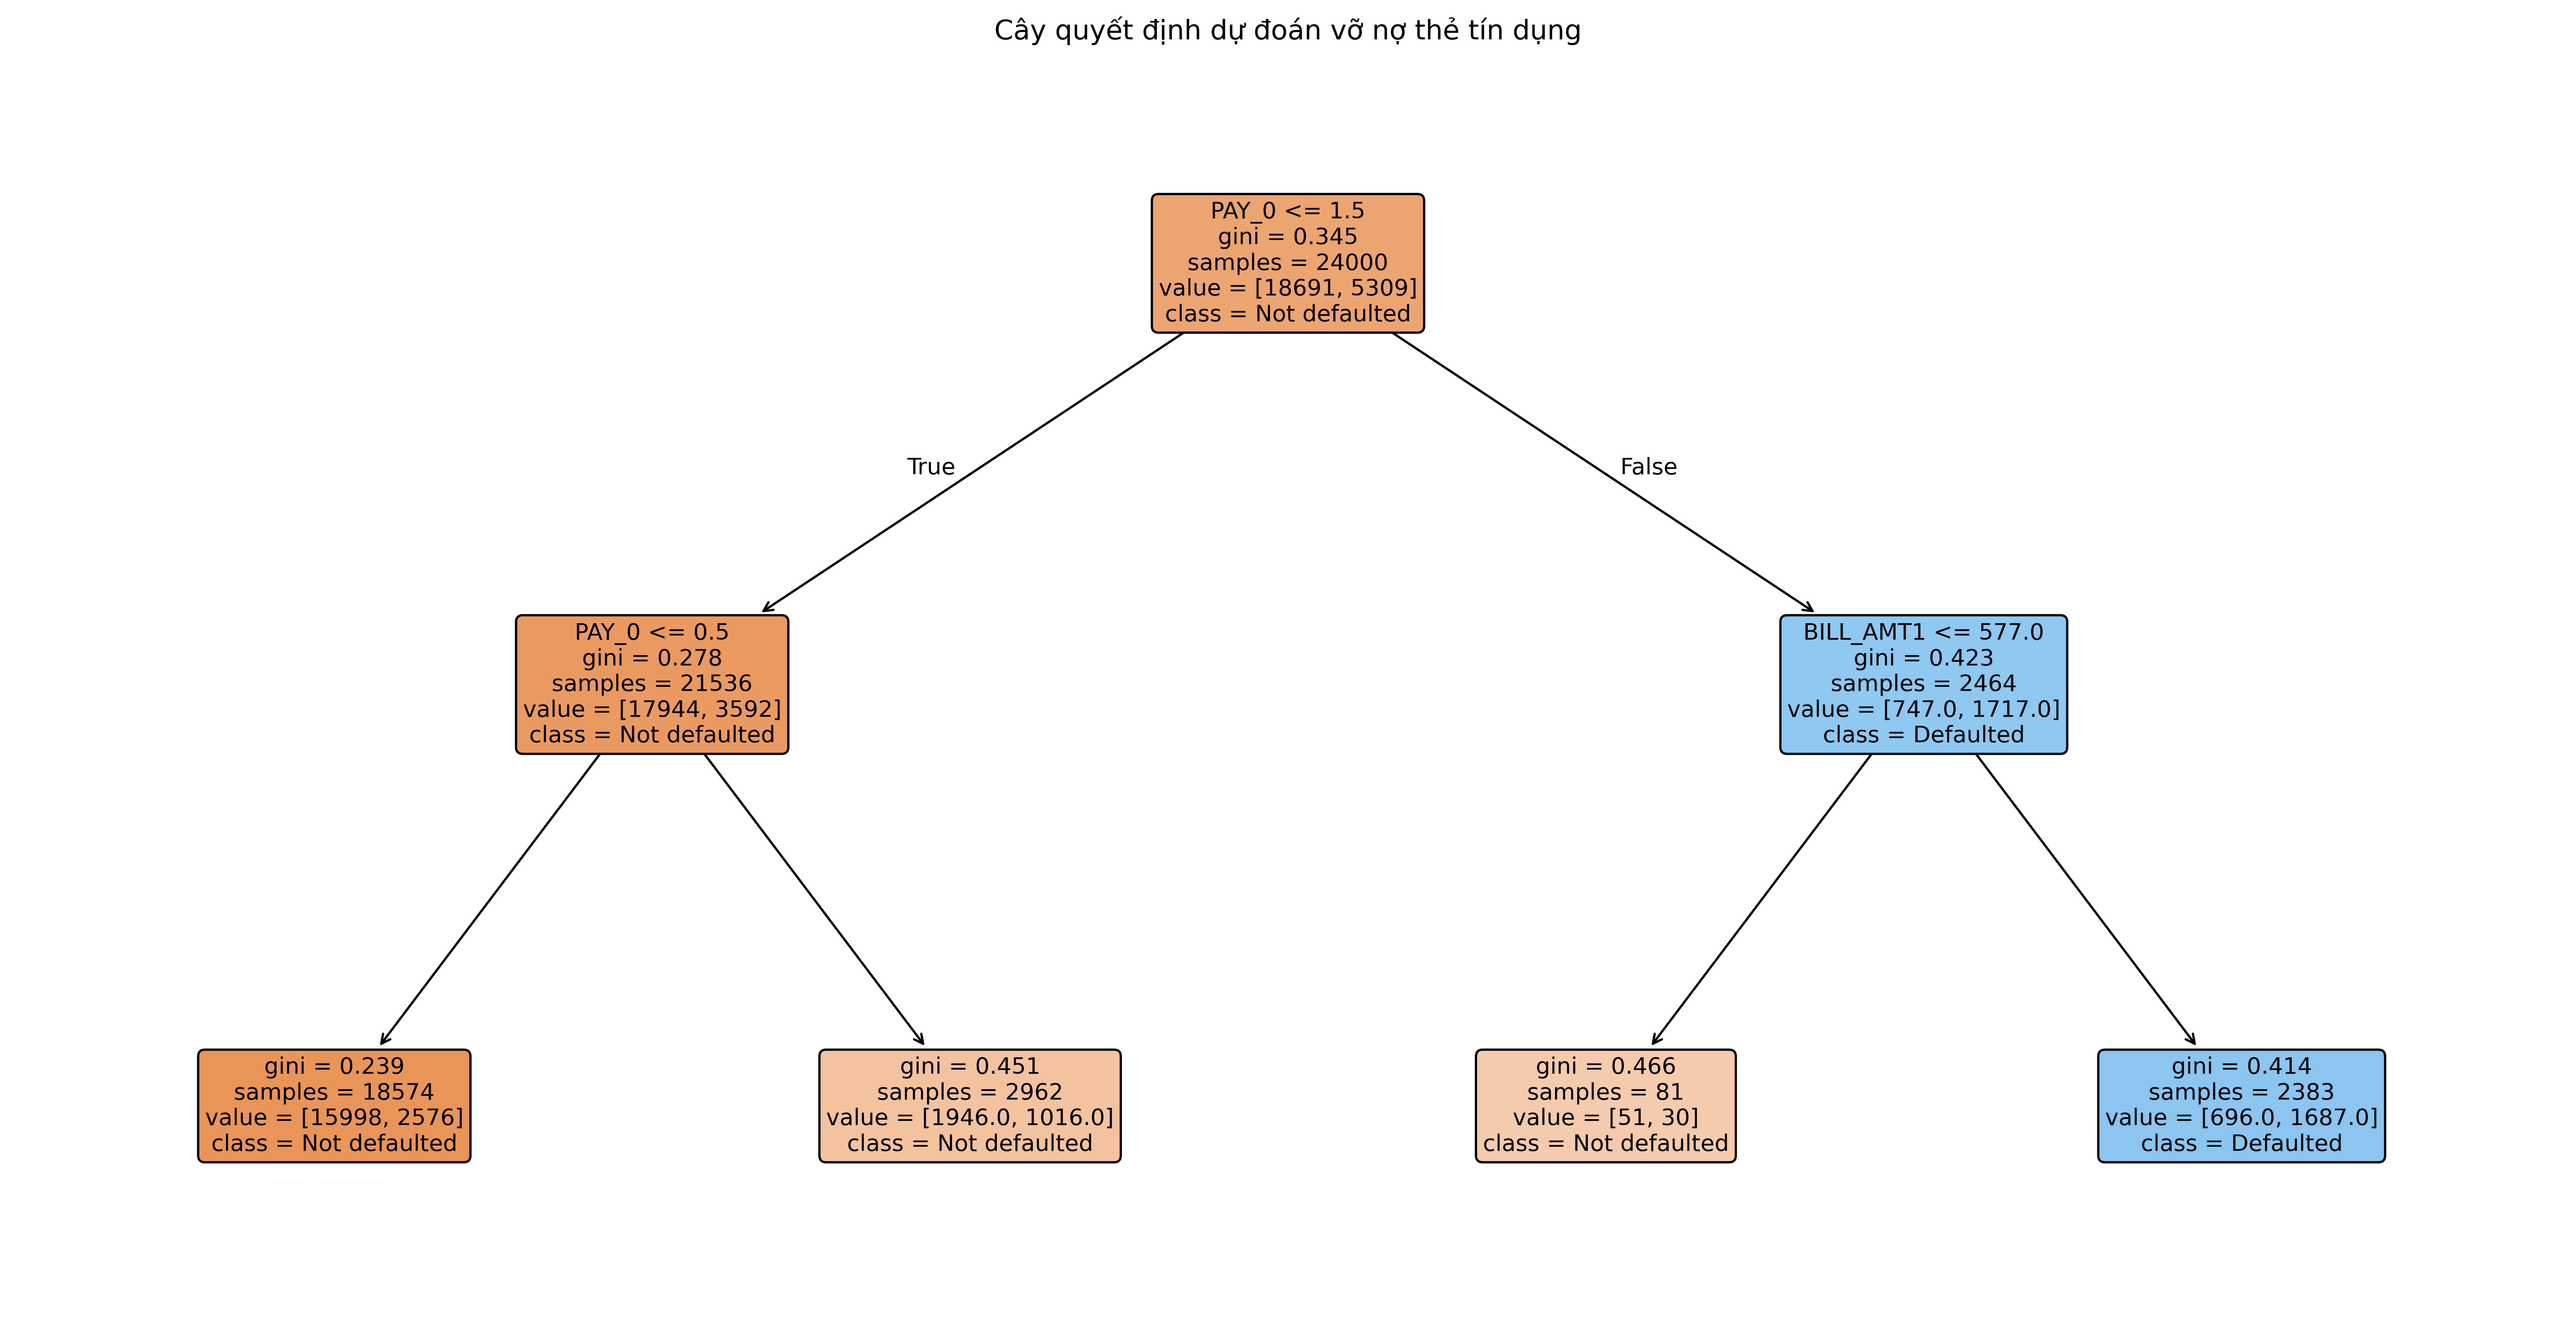

In [6]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(dt, 
          filled=True,
          rounded=True,
          feature_names=features_response[:-1],
          class_names=['Not defaulted', 'Defaulted'],
          fontsize=10,
          max_depth=3)  # Hi·ªÉn th·ªã 3 t·∫ßng ƒë·∫ßu cho d·ªÖ nh√¨n
plt.title('C√¢y quy·∫øt ƒë·ªãnh d·ª± ƒëo√°n v·ª° n·ª£ th·∫ª t√≠n d·ª•ng')
plt.show()

##### Nhi·ªám v·ª• 2: T√¨m tham s·ªë t·ªëi ∆∞u cho c√¢y quy·∫øt ƒë·ªãnh b·∫±ng GridSearchCV v√† v·∫Ω bi·ªÉu ƒë·ªì ƒë√°nh gi√° m√¥ h√¨nh v·ªõi c√°c tham s·ªë kh√°c nhau

**1. Th·ª±c hi·ªán 1, 2 v√† 3 nh∆∞ ·ªü nhi·ªám v·ª• 1 ƒë·ªÉ t·∫£i th∆∞ vi·ªán, n·∫°p d·ªØ li·ªáu v√† chu·∫©n b·ªã d·ªØ li·ªáu**

**2. T·∫°o c√¢y quy·∫øt ƒë·ªãnh v√† x√°c ƒë·ªãnh c√°c gi√° tr·ªã tham s·ªë c√≥ th·ªÉ ch·ªçn ƒë·ªÉ t√¨m tham s·ªë t·ªëi ∆∞u**

In [8]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth':[1, 2, 4, 6, 8, 10, 12]} #parameters
#Th·ª≠ 7 gi√° tr·ªã ƒë·ªô s√¢u kh√°c nhau t·ª´ c√¢y r·∫•t n√¥ng (depth=1) ƒë·∫øn kh√° s√¢u (depth=12)

dt = tree.DecisionTreeClassifier() #tree modal
cv = GridSearchCV(dt, param_grid=params, scoring='roc_auc',
n_jobs=None, refit=True, cv=4, verbose=1,
error_score=np.nan,
return_train_score=True) # cv is the best model.
#scoring='roc_auc' ‚Üí ∆Øu ti√™n ph√¢n lo·∫°i t·ªët (AUC quan tr·ªçng h∆°n accuracy)

#cv=4 ‚Üí 4-fold cross-validation (chia data th√†nh 4 ph·∫ßn, train 3 test 1)

#refit=True ‚Üí T·ª± ƒë·ªông train l·∫°i model t·ªët nh·∫•t tr√™n to√†n b·ªô data

#verbose=1 ‚Üí Hi·ªÉn th·ªã ti·∫øn tr√¨nh

return_train_score=True ‚Üí Ghi l·∫°i ƒëi·ªÉm train ƒë·ªÉ so s√°nh overfitting
cv.fit(X_train, y_train)

Fitting 4 folds for each of 7 candidates, totalling 28 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 4, 6, 8, 10, 12]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [19]:
# Sau khi ch·∫°y xong, xem k·∫øt qu·∫£:
print("ƒê·ªô s√¢u t·ªët nh·∫•t:", cv.best_params_)
print("ƒêi·ªÉm AUC t·ªët nh·∫•t:", cv.best_score_)

# Model t·ªët nh·∫•t ƒë√£ ƒë∆∞·ª£c train t·ª± ƒë·ªông
best_dt = cv.best_estimator_

ƒê·ªô s√¢u t·ªët nh·∫•t: {'max_depth': 6}
ƒêi·ªÉm AUC t·ªët nh·∫•t: 0.7464000301203957


**3. V·∫Ω bi·ªÉu ƒë·ªì ƒë√°nh gi√° m√¥ h√¨nh v·ªõi c√°c tham s·ªë chi·ªÅu s√¢u c·ªßa c√¢y kh√°c nhau**

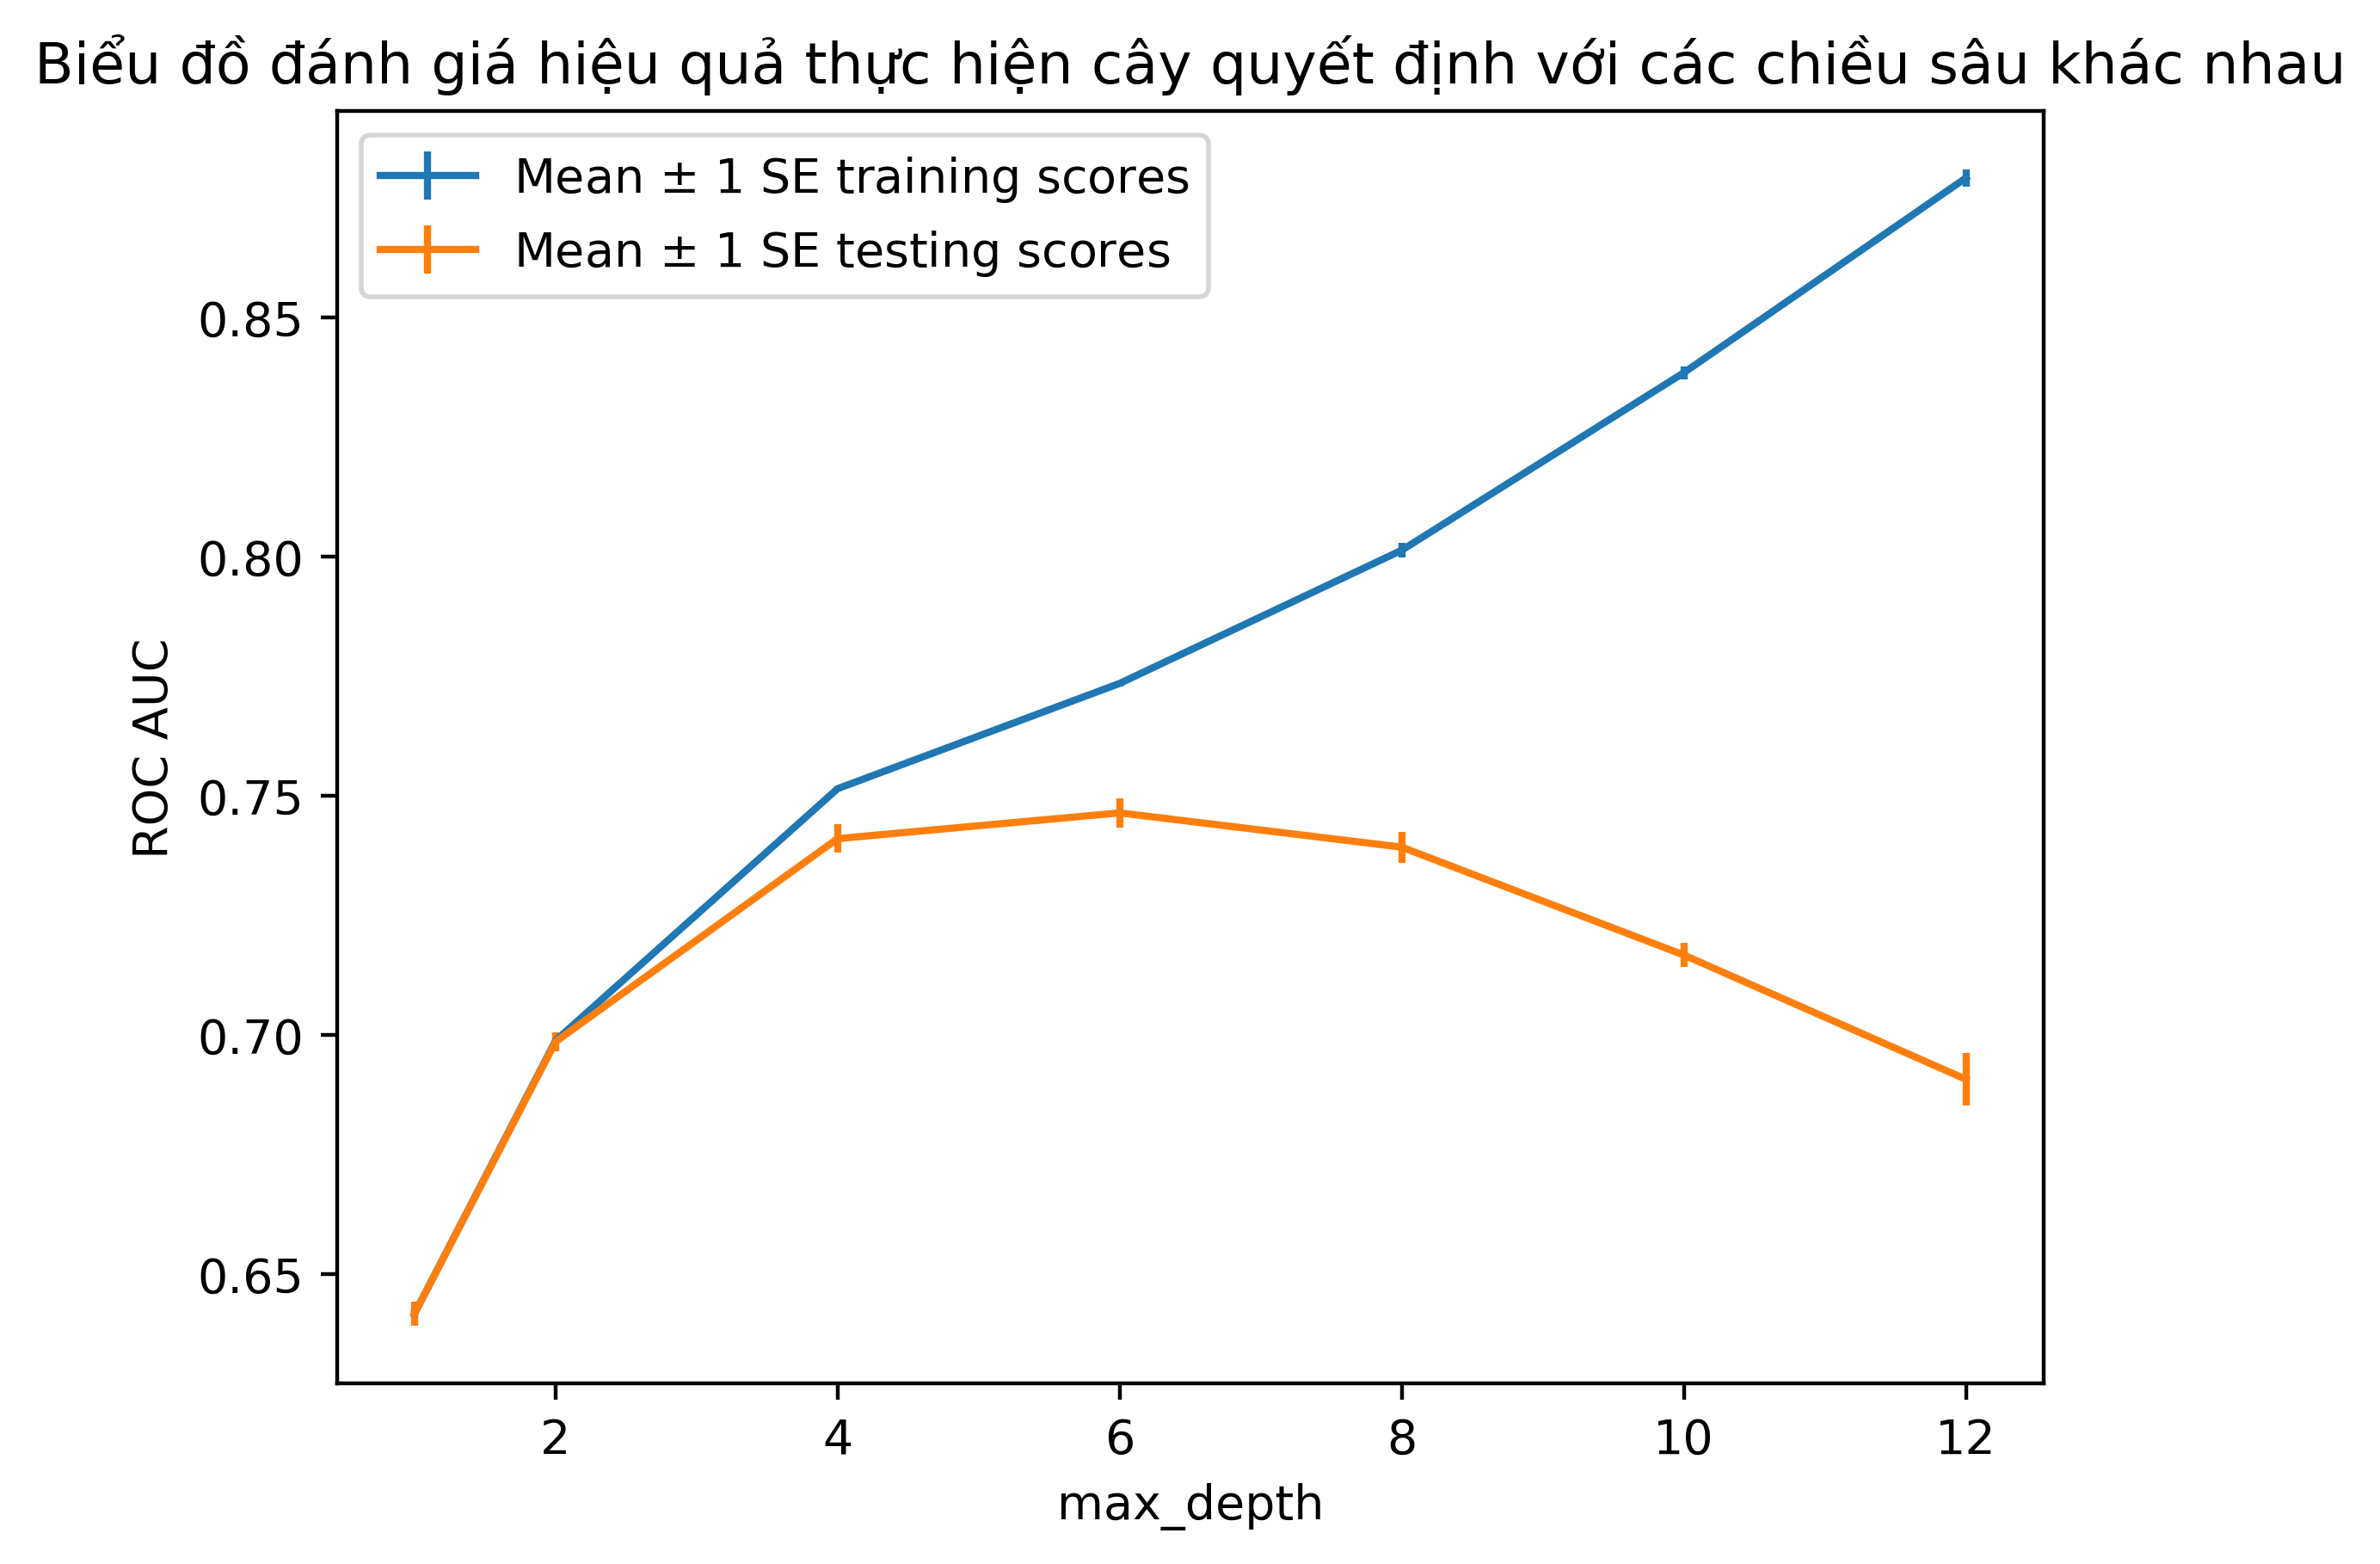

In [13]:
cv_results_df = pd.DataFrame(cv.cv_results_)

# View the names of the remaining columns in the results DataFrame
cv_results_df.columns

ax = plt.axes()
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_train_score'],
            yerr=cv_results_df['std_train_score']/np.sqrt(4),
            label='Mean $\pm$ 1 SE training scores')
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_test_score'],
            yerr=cv_results_df['std_test_score']/np.sqrt(4),
            label='Mean $\pm$ 1 SE testing scores')
ax.legend()
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')
plt.title('Bi·ªÉu ƒë·ªì ƒë√°nh gi√° hi·ªáu qu·∫£ th·ª±c hi·ªán c√¢y quy·∫øt ƒë·ªãnh v·ªõi c√°c chi·ªÅu s√¢u kh√°c nhau')
plt.show()

##### Nhi·ªám v·ª• 3: X√¢y d·ª±ng r·ª´ng c√¢y (random forest)

**1. Th·ª±c hi·ªán 1, 2 v√† 3 nh∆∞ ·ªü nhi·ªám v·ª• 1 ƒë·ªÉ t·∫£i th∆∞ vi·ªán, n·∫°p d·ªØ li·ªáu v√† chu·∫©n b·ªã d·ªØ li·ªáu**
    
**2. T·∫°o r·ª´ng c√¢y v·ªõi l·ªõp RandomForestClassifier trong Scikit-Learn**

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=10, 
    criterion='gini', 
    max_depth=3,
    min_samples_split=2, 
    min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0,
    max_features='sqrt', 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0,
    bootstrap=True, 
    oob_score=False, 
    n_jobs=None,
    random_state=4, 
    verbose=0, 
    warm_start=False, 
    class_weight=None
)

**3. T√¨m tham s·ªë t·ªëi ∆∞u cho m√¥ h√¨nh r·ª´ng c√¢y v√† th·ª±c hi·ªán train v·ªõi tham s·ªë t·ªëi ∆∞u ƒë√≥**

In [24]:
# A parameter grid for this exercise in order to search the numbers of
# trees, ranging from 10 to 100 by 10s
rf_params_ex = {'n_estimators': list(range(10, 110, 10))}
cv_rf_ex = GridSearchCV(rf, param_grid=rf_params_ex,
                      scoring='roc_auc', n_jobs=None,
                      refit=True, cv=4, verbose=1,
                      error_score=np.nan,
                      return_train_score=True)

cv_rf_ex.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=3, n_estimators=10,
                                              random_state=4),
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [25]:
print("S·ªë c√¢y t·ªët nh·∫•t:", cv_rf_ex.best_params_)
print("ƒêi·ªÉm AUC t·ªët nh·∫•t:", cv_rf_ex.best_score_)

# Model t·ªët nh·∫•t ƒë√£ ƒë∆∞·ª£c train s·∫µn
best_rf = cv_rf_ex.best_estimator_

S·ªë c√¢y t·ªët nh·∫•t: {'n_estimators': 50}
ƒêi·ªÉm AUC t·ªët nh·∫•t: 0.7628644271833113


**4. V·∫Ω bi·ªÉu ƒë·ªì ƒë√°nh gi√° m√¥ h√¨nh r·ª´ng c√¢y v·ªõi c√°c tham s·ªë s·ªë c√¢y c√≥ trong r·ª´ng kh√°c nhau**

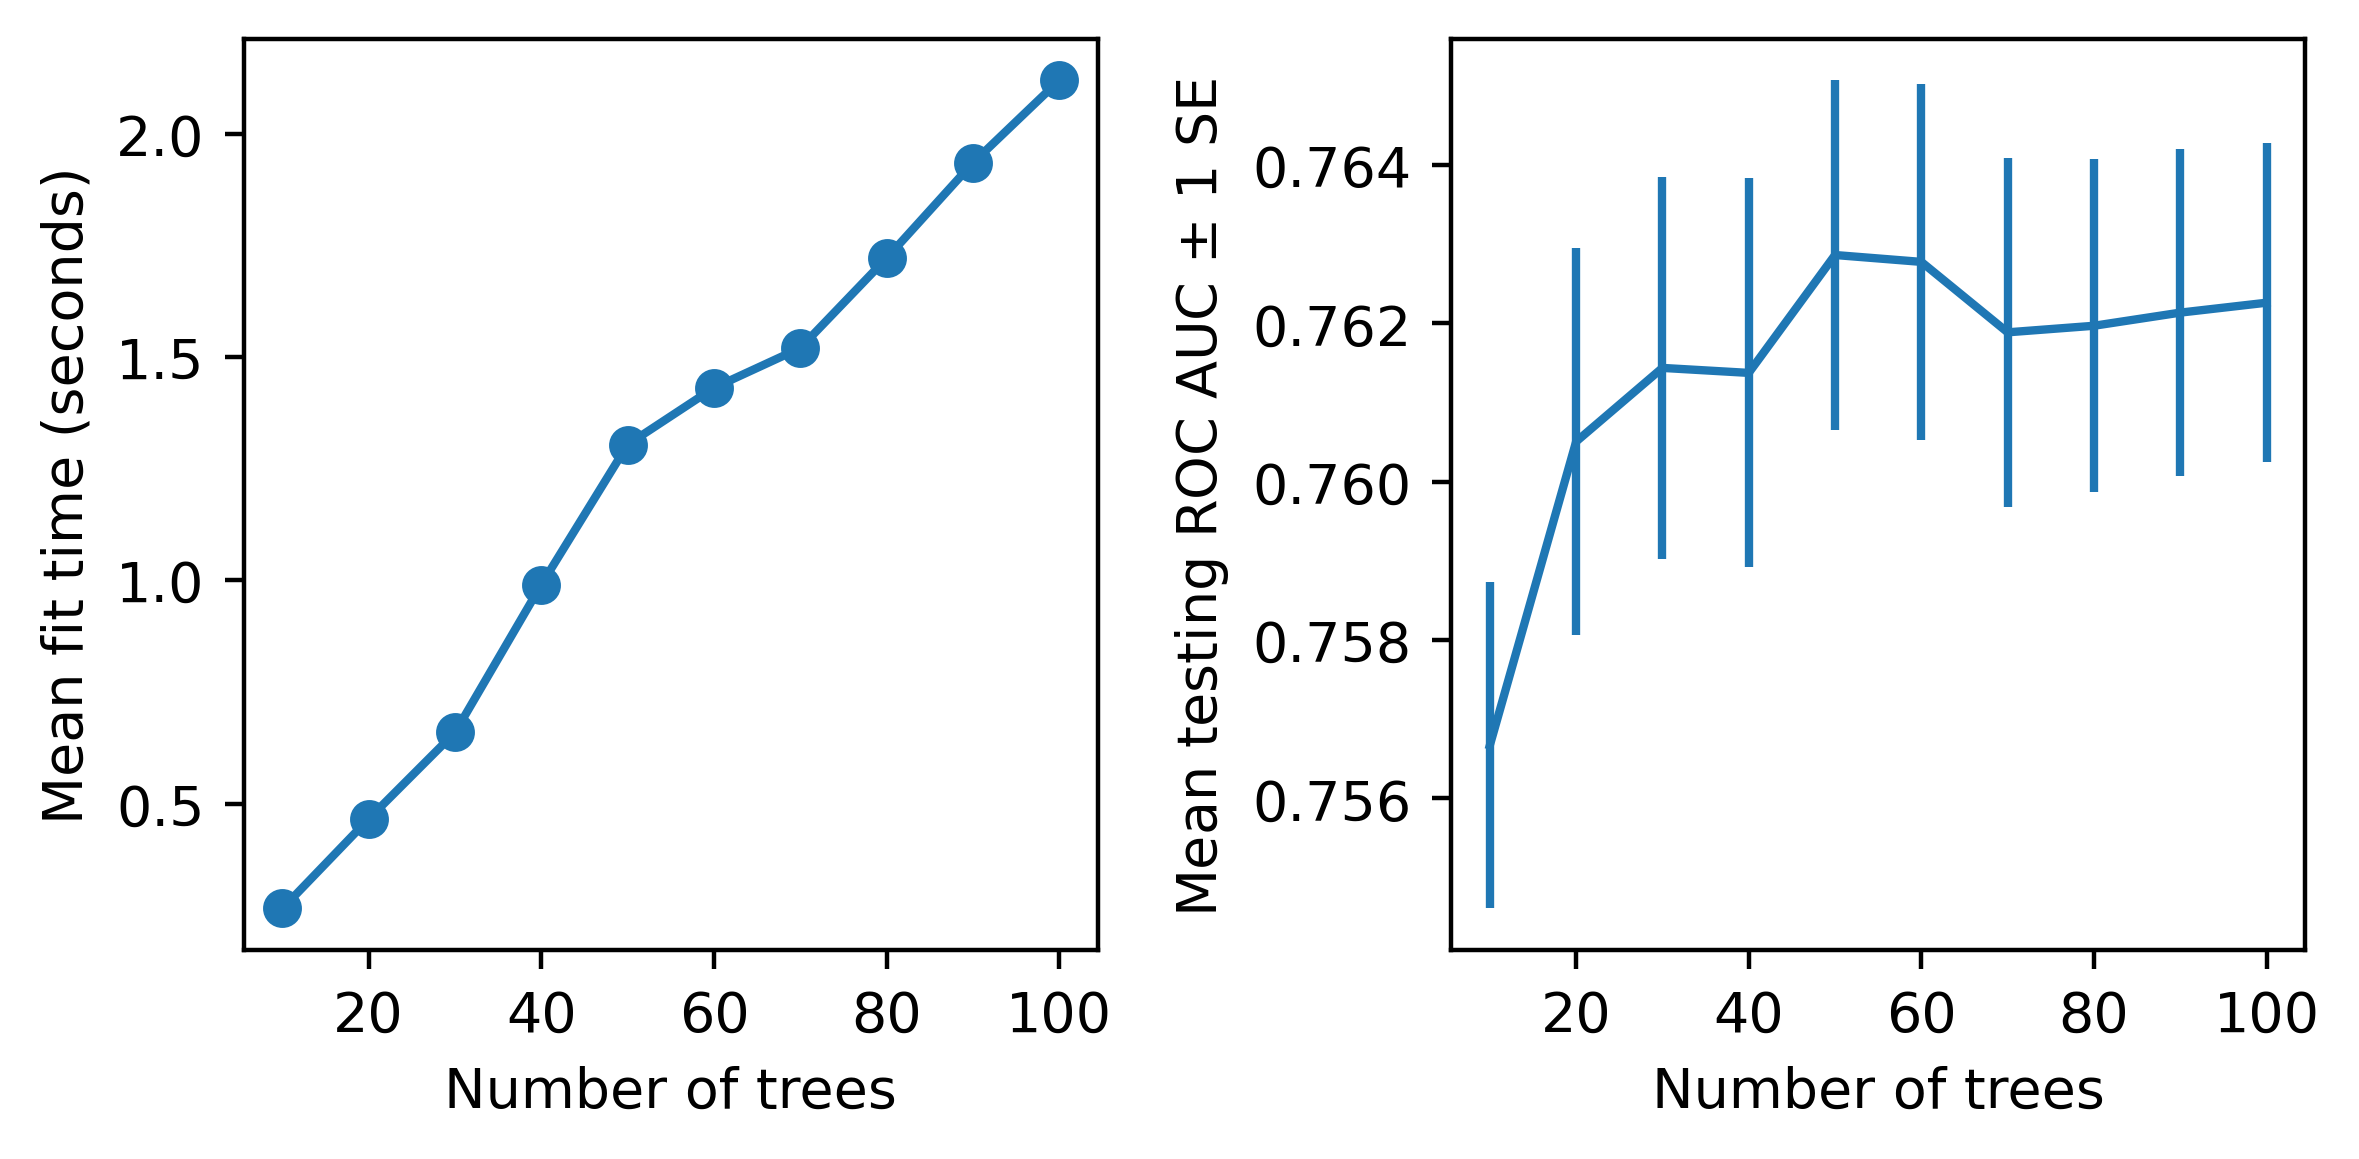

In [26]:
cv_rf_ex_results_df = pd.DataFrame(cv_rf_ex.cv_results_)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
axs[0].plot(cv_rf_ex_results_df['param_n_estimators'],
cv_rf_ex_results_df['mean_fit_time'],
'-o')
axs[0].set_xlabel('Number of trees')
axs[0].set_ylabel('Mean fit time (seconds)')
axs[1].errorbar(cv_rf_ex_results_df['param_n_estimators'],
cv_rf_ex_results_df['mean_test_score'],
yerr=cv_rf_ex_results_df['std_test_score']/np.sqrt(4))
axs[1].set_xlabel('Number of trees')
axs[1].set_ylabel('Mean testing ROC AUC $\pm$ 1 SE ')
plt.tight_layout()
plt.show()

**5. Xem tham s·ªë t·ªët nh·∫•t c·ªßa r·ª´ng c√¢y, xem m·ª©c ƒë·ªô quan tr·ªçng c·ªßa t·ª´ng feature trong m√¥ h√¨nh v·ªõi tham
s·ªë t·ªët nh·∫•t**

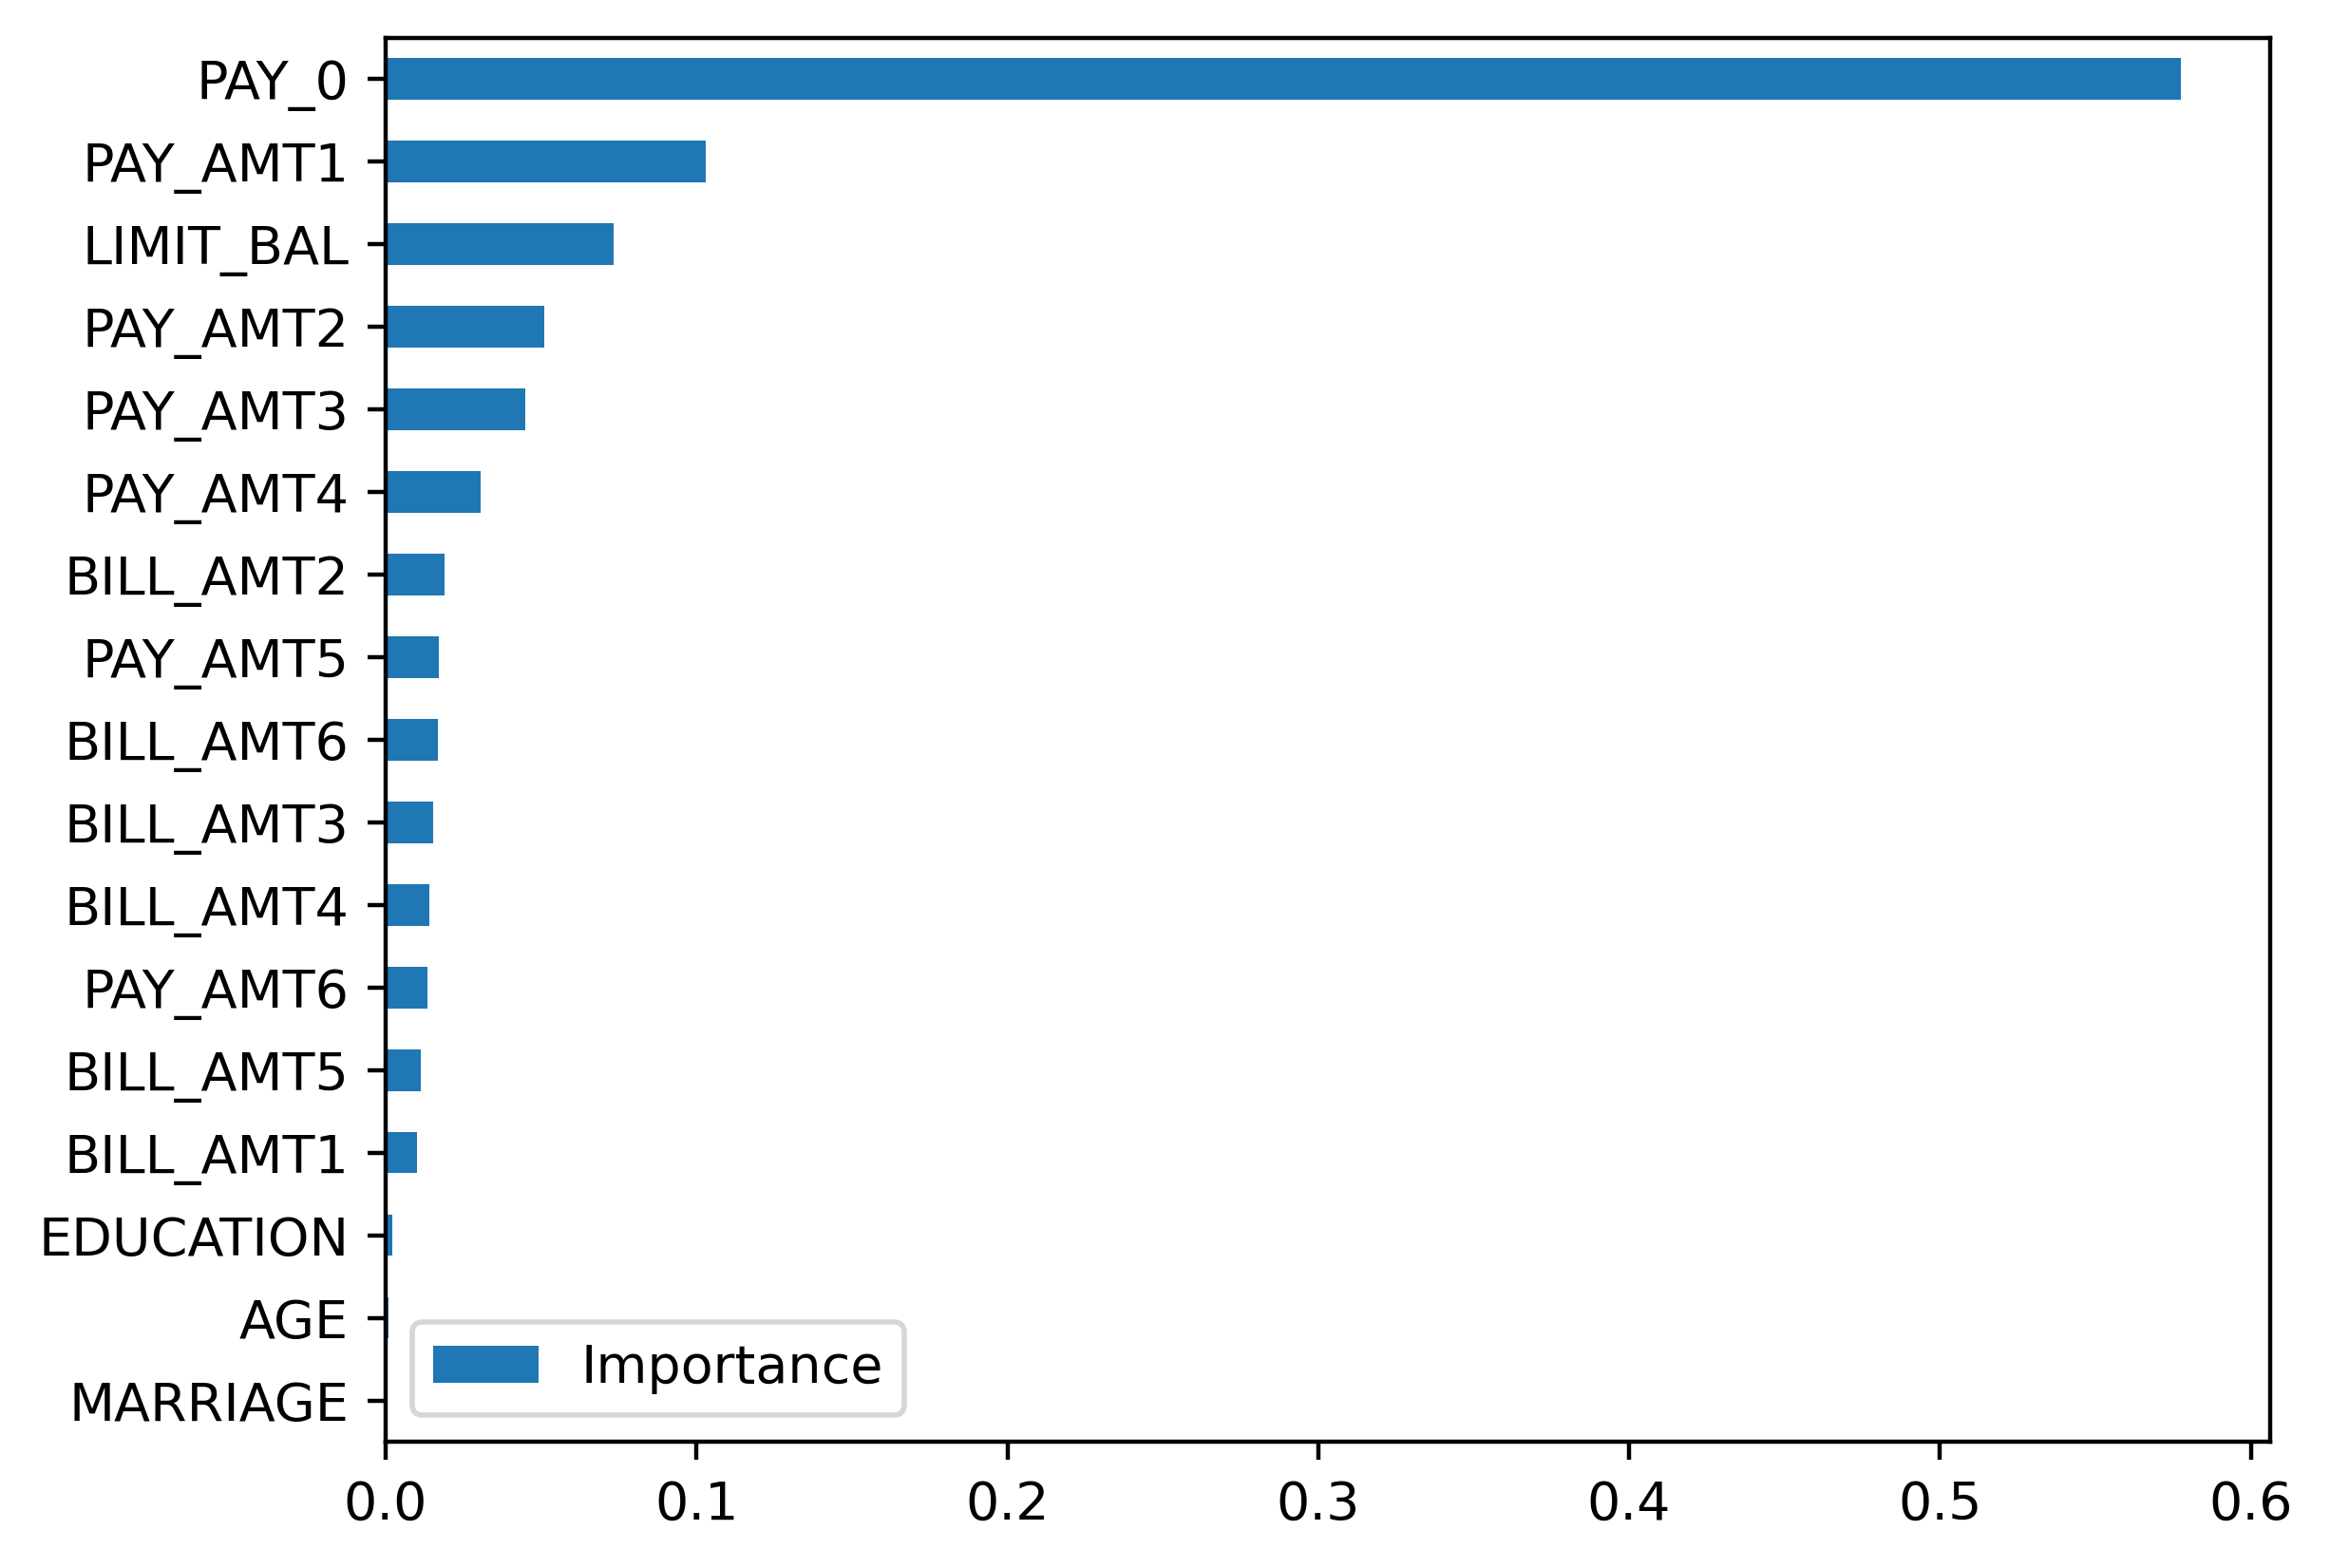

In [29]:
# {'n_estimators': 50}
cv_rf_ex.best_params_
# the feature names and importances
feat_imp_df = pd.DataFrame({
'Importance':cv_rf_ex.best_estimator_.feature_importances_},
index=features_response[:-1])
feat_imp_df.sort_values('Importance', ascending=True).plot.barh()
plt.show()

### 2.1.3. B√†i t·∫≠p th·ª±c h√†nh 1

X√¢y d·ª±ng c√¢y quy·∫øt ƒë·ªãnh v√† r·ª´ng c√¢y tr√™n d·ªØ li·ªáu Titanic l·∫•y t·ª´
https://www.kaggle.com/code/dmilla/introduction-to-decision-trees-titanic-dataset

M·ª•c ti√™u c·ªßa d·ª± √°n n√†y l√† x√¢y d·ª±ng v√† so s√°nh c√°c m√¥ h√¨nh C√¢y quy·∫øt ƒë·ªãnh (Decision Tree) v√† R·ª´ng ng·∫´u nhi√™n (Random Forest) tr√™n b·ªô d·ªØ li·ªáu Titanic ƒë·ªÉ v·ª´a ƒë·∫°t hi·ªáu nƒÉng d·ª± ƒëo√°n t·ªët v·ª´a r√∫t ra c√°c insight gi·∫£i th√≠ch ƒë∆∞·ª£c. Quy tr√¨nh bao g·ªìm: ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu v√† k·ªπ thu·∫≠t t·∫°o ƒë·∫∑c tr∆∞ng (feature engineering), ch·ªçn t·∫≠p ƒë·∫∑c tr∆∞ng ph√π h·ª£p, hu·∫•n luy·ªán m√¥ h√¨nh v·ªõi cross‚Äëvalidation ƒë·ªÉ tr√°nh overfitting, t·ªëi ∆∞u tham s·ªë, ƒë√°nh gi√° hi·ªáu nƒÉng b·∫±ng c√°c ch·ªâ s·ªë ph√π h·ª£p v√† tr·ª±c quan h√≥a c·∫•u tr√∫c c√¢y c√πng t·∫ßm quan tr·ªçng c·ªßa ƒë·∫∑c tr∆∞ng. K·∫øt qu·∫£ k·ª≥ v·ªçng kh√¥ng ch·ªâ l√† m·ªôt m√¥ h√¨nh c√≥ ƒë·ªô ch√≠nh x√°c cao m√† c√≤n l√† c√°c quy t·∫Øc d·ªÖ hi·ªÉu gi√∫p gi·∫£i th√≠ch nh·ªØng y·∫øu t·ªë ·∫£nh h∆∞·ªüng ƒë·∫øn kh·∫£ nƒÉng s·ªëng s√≥t c·ªßa h√†nh kh√°ch.

#### 1. Import th∆∞ vi·ªán

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Hi·ªÉn th·ªã ƒë·ªì th·ªã trong notebook
%matplotlib inline
plt.style.use('seaborn-v0_8')

#### 2. ƒê·ªçc d·ªØ li·ªáu titanic

In [2]:
df = pd.read_csv("dataset/train.csv")
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

#### 3. Ki·ªÉm tra d·ªØ li·ªáu

In [3]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int6

#### 4. Ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu

In [4]:
# - ƒêi·ªÅn gi√° tr·ªã thi·∫øu cho Age, Embarked
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
df.drop(columns=["Cabin", "Ticket", "Name"], inplace=True)

C:\Users\boeot\AppData\Local\Temp\ipykernel_7268\1634785319.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\boeot\AppData\Local\Temp\ipykernel_7268\1634785319.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [5]:
# - M√£ h√≥a bi·∫øn ph√¢n lo·∫°i
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})

#### 5. Ch·ªçn ƒë·∫∑t tr∆∞ng v√† bi·∫øn m·ª•c ti√™u

In [6]:
# 5Ô∏è‚É£ Ch·ªçn ƒë·∫∑c tr∆∞ng v√† bi·∫øn m·ª•c ti√™u
X = df.drop(columns=["Survived", "PassengerId"])
y = df["Survived"]

#### 6. Chia d·ªØ li·ªáu train/test

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")

Train set: (712, 7), Test set: (179, 7)


#### 7. X√¢y d·ª±ng m√¥ h√¨nh Decision Tree

In [8]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [9]:
y_pred = dt.predict(X_test)
print("üéØ Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

üéØ Decision Tree Accuracy: 0.7988826815642458
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



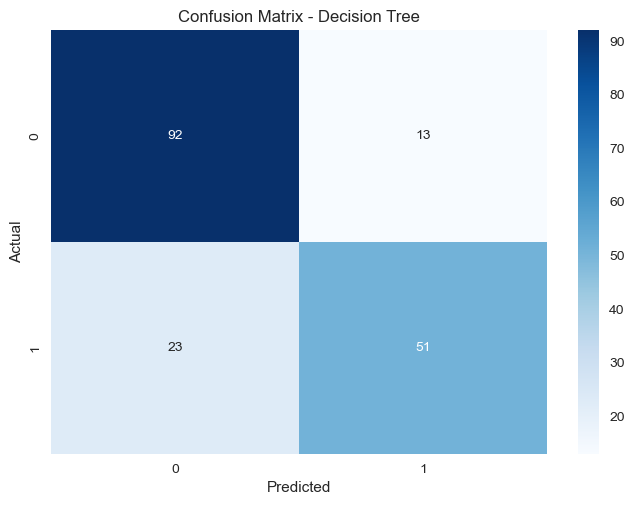

In [10]:
# Ma tr·∫≠n nh·∫ßm l·∫´n
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

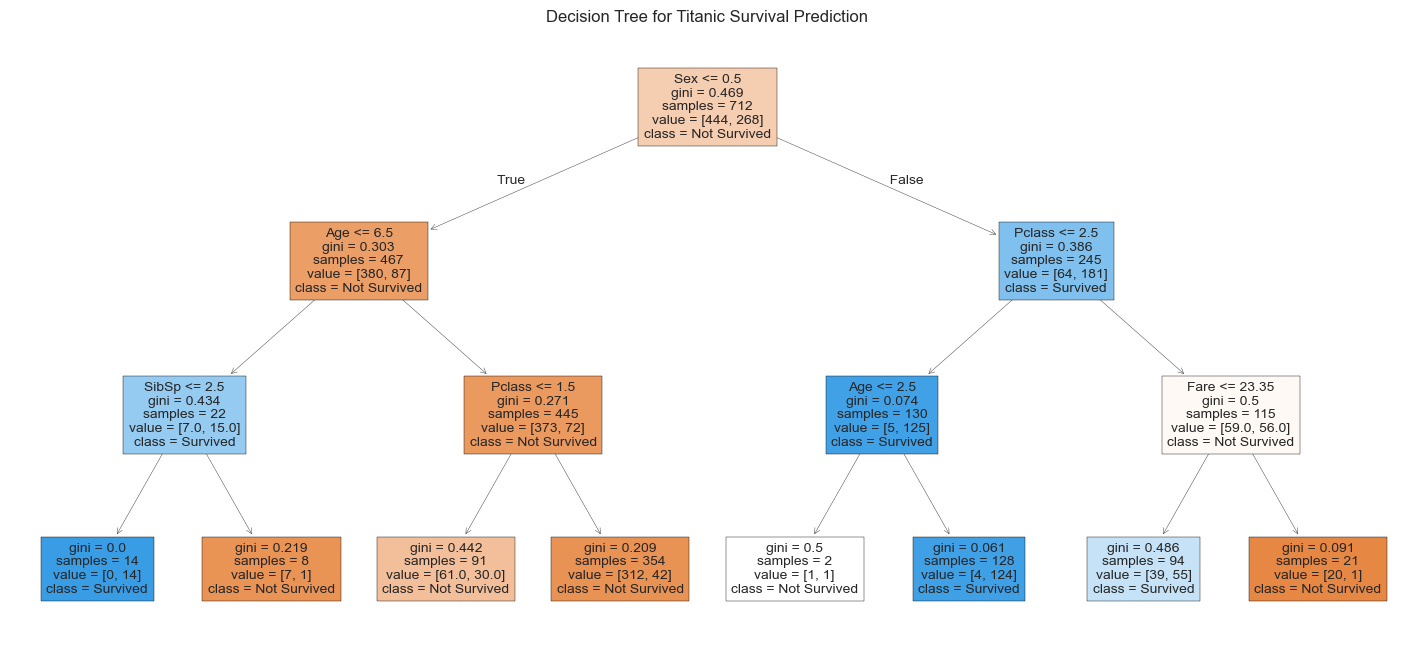

In [11]:
plt.figure(figsize=(18,8))
plot_tree(
    dt, 
    filled=True, 
    feature_names=X.columns, 
    class_names=["Not Survived", "Survived"], 
    fontsize=10
)
plt.title("Decision Tree for Titanic Survival Prediction")
plt.show()

#### 8. T·ªëi ∆∞u tham s·ªë cho Decision Tree b·∫±ng GridSearchCV

In [12]:
param_grid = {
    "max_depth": [2, 3, 4, 5, 6, 8, 10],
    "criterion": ["gini", "entropy"],
    "min_samples_split": [2, 5, 10]
}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring="accuracy")
grid_dt.fit(X_train, y_train)

print("‚úÖ Best parameters for Decision Tree:", grid_dt.best_params_)
print("‚úÖ Best score:", grid_dt.best_score_)

‚úÖ Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}
‚úÖ Best score: 0.8230079779375554


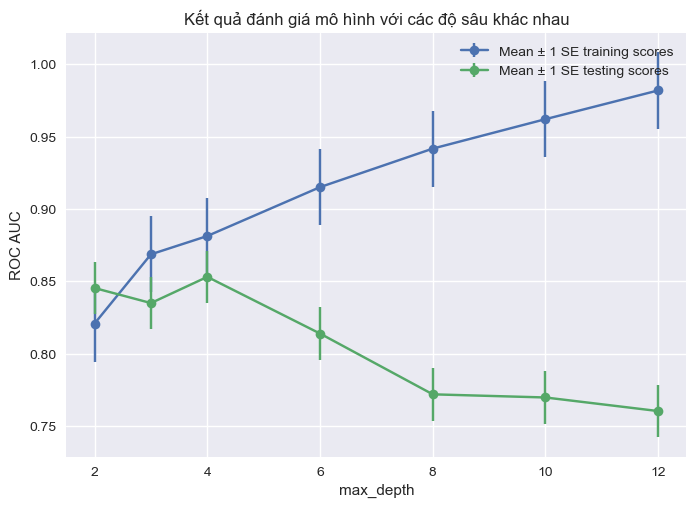

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

depths = [2, 3, 4, 6, 8, 10, 12]
train_scores = []
test_scores = []

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    # ƒêi·ªÉm train
    model.fit(X_train, y_train)
    train_scores.append(roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
    # ƒêi·ªÉm test (cross-validation)
    test_scores.append(cross_val_score(model, X_test, y_test, cv=5, scoring='roc_auc').mean())

# V·∫Ω bi·ªÉu ƒë·ªì c√≥ ¬±1 SE
plt.errorbar(depths, train_scores, yerr=np.std(train_scores)/np.sqrt(4),
             label='Mean ¬± 1 SE training scores', marker='o')
plt.errorbar(depths, test_scores, yerr=np.std(test_scores)/np.sqrt(4),
             label='Mean ¬± 1 SE testing scores', marker='o')
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')
plt.legend()
plt.title('K·∫øt qu·∫£ ƒë√°nh gi√° m√¥ h√¨nh v·ªõi c√°c ƒë·ªô s√¢u kh√°c nhau')
plt.show()


#### 9. Hu·∫•n luy·ªán m√¥ h√¨nh Random Forest

In [13]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

üéØ Random Forest Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.82      0.69      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



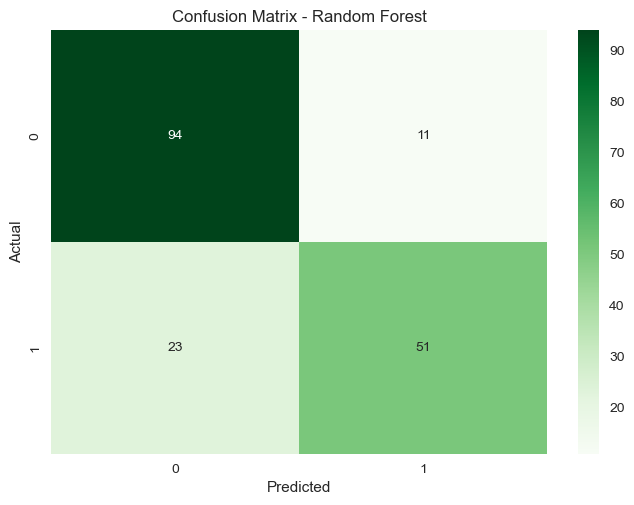

In [14]:
# D·ª± ƒëo√°n v√† ƒë√°nh gi√°
y_pred_rf = rf.predict(X_test)
print("üéØ Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

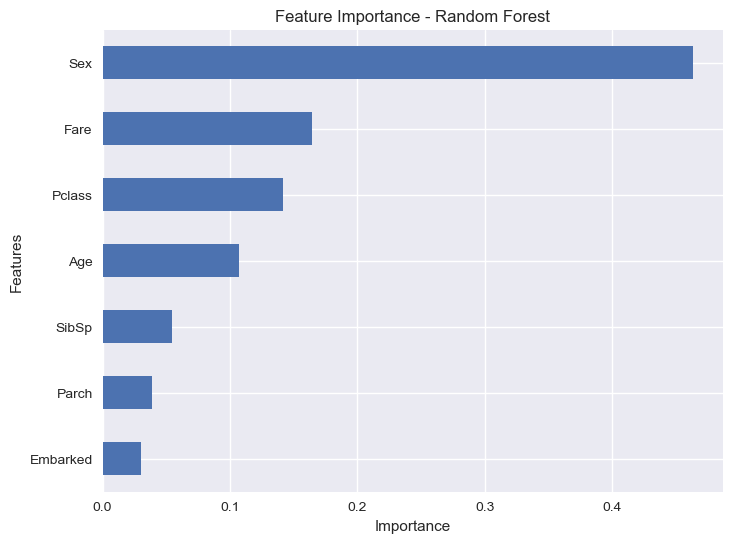

In [15]:
feat_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values()
plt.figure(figsize=(8,6))
feat_imp.plot(kind="barh")
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

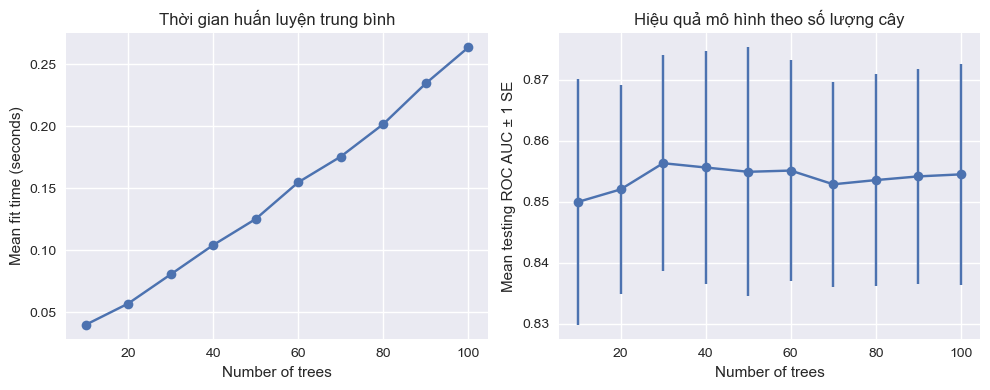

In [22]:

# T·∫°o Random Forest c∆° b·∫£n
rf = RandomForestClassifier(
    criterion='gini', 
    max_depth=5, 
    random_state=42
)

# Thi·∫øt l·∫≠p c√°c gi√° tr·ªã n_estimators ƒë·ªÉ th·ª≠
rf_params = {'n_estimators': list(range(10, 110, 10))}

# D√πng GridSearchCV ƒë·ªÉ ƒë√°nh gi√°
cv_rf = GridSearchCV(
    rf, 
    param_grid=rf_params, 
    scoring='roc_auc', 
    cv=4, 
    return_train_score=True
)
cv_rf.fit(X_train, y_train)

# K·∫øt qu·∫£ ƒë√°nh gi√°
cv_rf_results_df = pd.DataFrame(cv_rf.cv_results_)

# 1Ô∏è‚É£ Bi·ªÉu ƒë·ªì th·ªùi gian hu·∫•n luy·ªán trung b√¨nh
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(cv_rf_results_df['param_n_estimators'], 
            cv_rf_results_df['mean_fit_time'], '-o')
axs[0].set_xlabel('Number of trees')
axs[0].set_ylabel('Mean fit time (seconds)')
axs[0].set_title('Th·ªùi gian hu·∫•n luy·ªán trung b√¨nh')

# 2Ô∏è‚É£ Bi·ªÉu ƒë·ªì ROC AUC trung b√¨nh ¬± 1 SE
axs[1].errorbar(cv_rf_results_df['param_n_estimators'],
                cv_rf_results_df['mean_test_score'],
                yerr=cv_rf_results_df['std_test_score']/np.sqrt(4),
                fmt='-o', capsize=3)
axs[1].set_xlabel('Number of trees')
axs[1].set_ylabel('Mean testing ROC AUC ¬± 1 SE')
axs[1].set_title('Hi·ªáu qu·∫£ m√¥ h√¨nh theo s·ªë l∆∞·ª£ng c√¢y')

plt.tight_layout()
plt.show()


### 2.1.4. B√†i t·∫≠p th·ª±c h√†nh 2

X√¢y d·ª±ng c√¢y quy·∫øt ƒë·ªãnh v√† r·ª´ng c√¢y tr√™n d·ªØ li·ªáu b·ªánh ti·ªÉu ƒë∆∞·ªùng. D·ªØ li·ªáu l·∫•y t·ª´
https://www.kaggle.com/code/tumpanjawat/diabetes-eda-random-forest-hp

#### Nhi·ªám v·ª• 1: X√¢y d·ª±ng c√¢y quy·∫øt ƒë·ªãnh b·∫±ng th∆∞ vi·ªán Scikit-Learn

##### 1. T·∫£i c√°c th∆∞ vi·ªán c·∫ßn thi·∫øt

In [ ]:
pip install graphviz


Note: you may need to restart the kernel to use updated packages.


In [1]:
# 1. Import c√°c th∆∞ vi·ªán c·∫ßn thi·∫øt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400  # tƒÉng ƒë·ªô ph√¢n gi·∫£i ·∫£nh

import graphviz  # d√πng ƒë·ªÉ hi·ªÉn th·ªã c√¢y quy·∫øt ƒë·ªãnh
from sklearn import tree
from sklearn.model_selection import train_test_split

##### 2. N·∫°p d·ªØ li·ªáu v√† xem th√¥ng tin

In [2]:
# 2. N·∫°p d·ªØ li·ªáu
df = pd.read_csv("Dataset/diabetes_prediction_dataset.csv")

print("‚úÖ D·ªØ li·ªáu ban ƒë·∫ßu:")
print(df.head())
print("-" * 60+"\n")
print("üìä Th√¥ng tin d·ªØ li·ªáu:")
print(df.info())
print("-" * 60+"\n")
print("üï≥Ô∏è Ki·ªÉm tra gi√° tr·ªã null:")
print(df.isnull().sum())


‚úÖ D·ªØ li·ªáu ban ƒë·∫ßu:
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  
------------------------------------------------------------

üìä Th√¥ng tin d·ªØ li·ªáu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  -

##### Nh·∫≠n x√©t d·ªØ li·ªáu

Dataset g·ªìm 100.000 d√≤ng v√† 9 c·ªôt, cung c·∫•p th√¥ng tin v·ªÅ c√°c y·∫øu t·ªë nguy c∆° v√† t√¨nh tr·∫°ng ti·ªÉu ƒë∆∞·ªùng c·ªßa b·ªánh nh√¢n.

C√°c c·ªôt gender v√† smoking_history l√† d·ªØ li·ªáu ph√¢n lo·∫°i (categorical), c√≤n c√°c c·ªôt age, bmi, HbA1c_level, blood_glucose_level l√† d·ªØ li·ªáu s·ªë (numerical).

C·ªôt diabetes l√† target, v·ªõi 0 = kh√¥ng ti·ªÉu ƒë∆∞·ªùng, 1 = ti·ªÉu ƒë∆∞·ªùng.

Dataset kh√¥ng c√≥ gi√° tr·ªã null, n√™n d·ªØ li·ªáu kh√° s·∫°ch, kh√¥ng c·∫ßn x·ª≠ l√Ω missing value.

C√≥ th·ªÉ quan s√°t ph√¢n b·ªë BMI, tu·ªïi, HbA1c v√† ƒë∆∞·ªùng huy·∫øt ƒë·ªÉ ƒë√°nh gi√° m·ªëi quan h·ªá gi·ªØa c√°c ch·ªâ s·ªë s·ª©c kh·ªèe v√† kh·∫£ nƒÉng m·∫Øc ti·ªÉu ƒë∆∞·ªùng, t·ª´ ƒë√≥ h·ªó tr·ª£ m√¥ h√¨nh d·ª± ƒëo√°n.

##### 3.M√£ h√≥a bi·∫øn ph√¢n lo·∫°i (One-Hot Encoding)

In [3]:
# 3. M√£ h√≥a c√°c bi·∫øn ph√¢n lo·∫°i
df_encoded = pd.get_dummies(df, columns=['gender', 'smoking_history'], drop_first=False)

print("‚úÖ D·ªØ li·ªáu sau m√£ h√≥a:")
print(df_encoded.head())

‚úÖ D·ªØ li·ªáu sau m√£ h√≥a:
    age  hypertension  heart_disease    bmi  HbA1c_level  blood_glucose_level  \
0  80.0             0              1  25.19          6.6                  140   
1  54.0             0              0  27.32          6.6                   80   
2  28.0             0              0  27.32          5.7                  158   
3  36.0             0              0  23.45          5.0                  155   
4  76.0             1              1  20.14          4.8                  155   

   diabetes  gender_Female  gender_Male  gender_Other  \
0         0           True        False         False   
1         0           True        False         False   
2         0          False         True         False   
3         0           True        False         False   
4         0          False         True         False   

   smoking_history_No Info  smoking_history_current  smoking_history_ever  \
0                    False                    False            



Trong dataset, c√°c c·ªôt gender v√† smoking_history l√† d·ªØ li·ªáu ph√¢n lo·∫°i (categorical). M√¥ h√¨nh m√°y h·ªçc nh∆∞ Decision Tree ch·ªâ hi·ªÉu d·ªØ li·ªáu s·ªë, v√¨ v·∫≠y ch√∫ng ta c·∫ßn chuy·ªÉn c√°c gi√° tr·ªã ph√¢n lo·∫°i sang d·∫°ng nh·ªã ph√¢n (one-hot encoding).

- S·ª≠ d·ª•ng pd.get_dummies() ƒë·ªÉ t·∫°o m·ªôt c·ªôt cho m·ªói gi√° tr·ªã c·ªßa bi·∫øn ph√¢n lo·∫°i.
- drop_first=False gi·ªØ t·∫•t c·∫£ c√°c c·ªôt m·ªõi, gi√∫p m√¥ h√¨nh xem x√©t ƒë·∫ßy ƒë·ªß th√¥ng tin.
- V√≠ d·ª•:
  - gender c√≥ gi√° tr·ªã Female, Male, Other ‚Üí ƒë∆∞·ª£c chuy·ªÉn th√†nh ba c·ªôt: gender_Female, gender_Male, gender_Other.
  - smoking_history c√≥ nhi·ªÅu gi√° tr·ªã nh∆∞ never, current, former‚Ä¶ ‚Üí ƒë∆∞·ª£c chuy·ªÉn th√†nh c√°c c·ªôt ri√™ng.

K·∫øt qu·∫£ l√† m·ªói h√†ng d·ªØ li·ªáu gi·ªù s·∫Ω c√≥ c√°c c·ªôt True/False t∆∞∆°ng ·ª©ng v·ªõi gi√° tr·ªã ph√¢n lo·∫°i c·ªßa n√≥, v√† t·∫•t c·∫£ c√°c c·ªôt numeric gi·ªØ nguy√™n. ƒêi·ªÅu n√†y cho ph√©p Decision Tree v√† c√°c m√¥ h√¨nh kh√°c s·ª≠ d·ª•ng ƒë·∫ßy ƒë·ªß th√¥ng tin t·ª´ c√°c bi·∫øn ph√¢n lo·∫°i.


##### 4.Chia d·ªØ li·ªáu th√†nh t·∫≠p train / test

In [4]:
# 4. T√°ch ƒë·∫ßu v√†o (X) v√† nh√£n ƒë·∫ßu ra (y)
X = df_encoded.drop("diabetes", axis=1)
y = df_encoded["diabetes"]

# Chia d·ªØ li·ªáu
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"‚úÖ T·∫≠p hu·∫•n luy·ªán: {X_train.shape}")
print(f"‚úÖ T·∫≠p ki·ªÉm tra: {X_test.shape}")


‚úÖ T·∫≠p hu·∫•n luy·ªán: (80000, 15)
‚úÖ T·∫≠p ki·ªÉm tra: (20000, 15)


Trong b∆∞·ªõc n√†y, ch√∫ng ta t√°ch d·ªØ li·ªáu th√†nh hai ph·∫ßn:

- X: c√°c ƒë·∫∑c tr∆∞ng (features), g·ªìm t·∫•t c·∫£ c√°c c·ªôt ngo·∫°i tr·ª´ c·ªôt diabetes.
- y: nh√£n ƒë·∫ßu ra (target), ch√≠nh l√† c·ªôt diabetes.

Sau ƒë√≥, d·ªØ li·ªáu ƒë∆∞·ª£c chia th√†nh t·∫≠p hu·∫•n luy·ªán (train) v√† t·∫≠p ki·ªÉm tra (test) ƒë·ªÉ ƒë√°nh gi√° m√¥ h√¨nh:

- test_size=0.2 nghƒ©a l√† 20% d·ªØ li·ªáu d√πng ƒë·ªÉ ki·ªÉm tra, 80% d√πng ƒë·ªÉ hu·∫•n luy·ªán.
- random_state=42 ƒë·∫£m b·∫£o vi·ªác chia d·ªØ li·ªáu c√≥ th·ªÉ l·∫∑p l·∫°i ƒë∆∞·ª£c.

K·∫øt qu·∫£ tr√™n dataset c·ªßa ch√∫ng ta:

- T·∫≠p hu·∫•n luy·ªán: 80.000 m·∫´u, 15 ƒë·∫∑c tr∆∞ng.
- T·∫≠p ki·ªÉm tra: 20.000 m·∫´u, 15 ƒë·∫∑c tr∆∞ng.

Vi·ªác chia d·ªØ li·ªáu gi√∫p m√¥ h√¨nh h·ªçc t·ª´ ph·∫ßn l·ªõn d·ªØ li·ªáu nh∆∞ng v·∫´n ƒë∆∞·ª£c ki·ªÉm tra tr√™n d·ªØ li·ªáu ch∆∞a th·∫•y, t·ª´ ƒë√≥ ƒë√°nh gi√° kh·∫£ nƒÉng t·ªïng qu√°t h√≥a.








##### 5.Hu·∫•n luy·ªán m√¥ h√¨nh Decision Tree

In [5]:
# 5. X√¢y d·ª±ng m√¥ h√¨nh c√¢y quy·∫øt ƒë·ªãnh
dt = tree.DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

print(" M√¥ h√¨nh c√¢y quy·∫øt ƒë·ªãnh ƒë√£ ƒë∆∞·ª£c hu·∫•n luy·ªán xong!")


 M√¥ h√¨nh c√¢y quy·∫øt ƒë·ªãnh ƒë√£ ƒë∆∞·ª£c hu·∫•n luy·ªán xong!


##### 6.Hi·ªÉn th·ªã c√¢y b·∫±ng Graphviz


(process:7796): Pango-CRITICAL **: 19:46:41.194: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:7796): Pango-CRITICAL **: 19:46:41.194: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:7796): Pango-CRITICAL **: 19:46:41.194: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:7796): Pango-CRITICAL **: 19:46:41.194: pango_font_description_get_family: assertion 'desc != NULL' failed


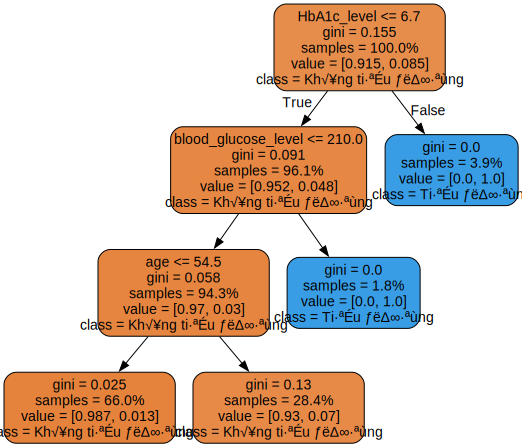

In [6]:
# 6. Xu·∫•t c√¢y quy·∫øt ƒë·ªãnh
dot_data = tree.export_graphviz(
    dt,
    out_file=None,
    filled=True,
    rounded=True,
    feature_names=X.columns,
    class_names=["Kh√¥ng ti·ªÉu ƒë∆∞·ªùng", "Ti·ªÉu ƒë∆∞·ªùng"],
    proportion=True
)

# Hi·ªÉn th·ªã c√¢y
graph = graphviz.Source(dot_data)
graph


#### Nhi·ªám v·ª• 2: T√¨m tham s·ªë t·ªëi ∆∞u cho c√¢y quy·∫øt ƒë·ªãnh b·∫±ng GridSearchCV v√† v·∫Ω bi·ªÉu ƒë·ªì ƒë√°nh gi√° m√¥ h√¨nh v·ªõi c√°c tham s·ªë kh√°c nhau

##### 1. T·∫°o c√¢y quy·∫øt ƒë·ªãnh v√† x√°c ƒë·ªãnh c√°c gi√° tr·ªã tham s·ªë c√≥ th·ªÉ ch·ªçn ƒë·ªÉ t√¨m tham s·ªë t·ªëi ∆∞u

In [7]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Khai b√°o t·∫≠p tham s·ªë ƒë·ªÉ d√≤ t√¨m gi√° tr·ªã t·ªëi ∆∞u cho ƒë·ªô s√¢u c·ªßa c√¢y
params = {'max_depth': [1, 2, 4, 6, 8, 10, 12]}

# Kh·ªüi t·∫°o m√¥ h√¨nh Decision Tree
dt = tree.DecisionTreeClassifier(random_state=42)

# C·∫•u h√¨nh GridSearchCV
cv = GridSearchCV(
    dt,
    param_grid=params,
    scoring='roc_auc',      # s·ª≠ d·ª•ng ƒë·ªô ƒëo AUC (ƒë√°nh gi√° kh·∫£ nƒÉng ph√¢n bi·ªát)
    n_jobs=None,
    refit=True,
    cv=4,                   # 4-fold cross validation
    verbose=1,
    error_score=np.nan,
    return_train_score=True # l∆∞u l·∫°i ƒëi·ªÉm hu·∫•n luy·ªán ƒë·ªÉ so s√°nh bias/variance
)

# Hu·∫•n luy·ªán m√¥ h√¨nh
cv.fit(X_train, y_train)

# In ra tham s·ªë t·ªët nh·∫•t v√† ƒëi·ªÉm s·ªë t∆∞∆°ng ·ª©ng
print("Best parameter (max_depth):", cv.best_params_)
print("Best ROC AUC score:", cv.best_score_)


Fitting 4 folds for each of 7 candidates, totalling 28 fits
Best parameter (max_depth): {'max_depth': 10}
Best ROC AUC score: 0.9739084146576757


Sau khi th·ª±c hi·ªán GridSearchCV v·ªõi 7 gi√° tr·ªã max_depth kh√°c nhau (t·ª´ 1 ƒë·∫øn 12), m√¥ h√¨nh ƒë·∫°t ƒëi·ªÉm ROC AUC cao nh·∫•t l√† 0.9733 khi ƒë·ªô s√¢u c·ªßa c√¢y = 10.

ƒêi·ªÅu n√†y cho th·∫•y c√¢y quy·∫øt ƒë·ªãnh c√≥ ƒë·ªô s√¢u 10 gi√∫p m√¥ h√¨nh ph√¢n bi·ªát hai l·ªõp hi·ªáu qu·∫£ nh·∫•t, ƒë·∫°t m·ª©c hi·ªáu su·∫•t g·∫ßn nh∆∞ ho√†n h·∫£o.

Tuy nhi√™n, ƒë·ªô s√¢u t∆∞∆°ng ƒë·ªëi l·ªõn c≈©ng cho th·∫•y m√¥ h√¨nh c√≥ xu h∆∞·ªõng h·ªçc k·ªπ h∆°n d·ªØ li·ªáu hu·∫•n luy·ªán, c·∫ßn ƒë·ªëi chi·∫øu v·ªõi k·∫øt qu·∫£ ki·ªÉm ƒë·ªãnh ƒë·ªÉ ƒë·∫£m b·∫£o kh√¥ng x·∫£y ra overfitting.

Nh√¨n chung, v·ªõi AUC ƒë·∫°t 97.33%, m√¥ h√¨nh th·ªÉ hi·ªán kh·∫£ nƒÉng ph√¢n lo·∫°i r·∫•t t·ªët cho b·ªô d·ªØ li·ªáu diabetes_prediction_dataset.csv.

##### 2. V·∫Ω bi·ªÉu ƒë·ªì ƒë√°nh gi√° m√¥ h√¨nh v·ªõi c√°c tham s·ªë chi·ªÅu s√¢u c·ªßa c√¢y kh√°c nhau

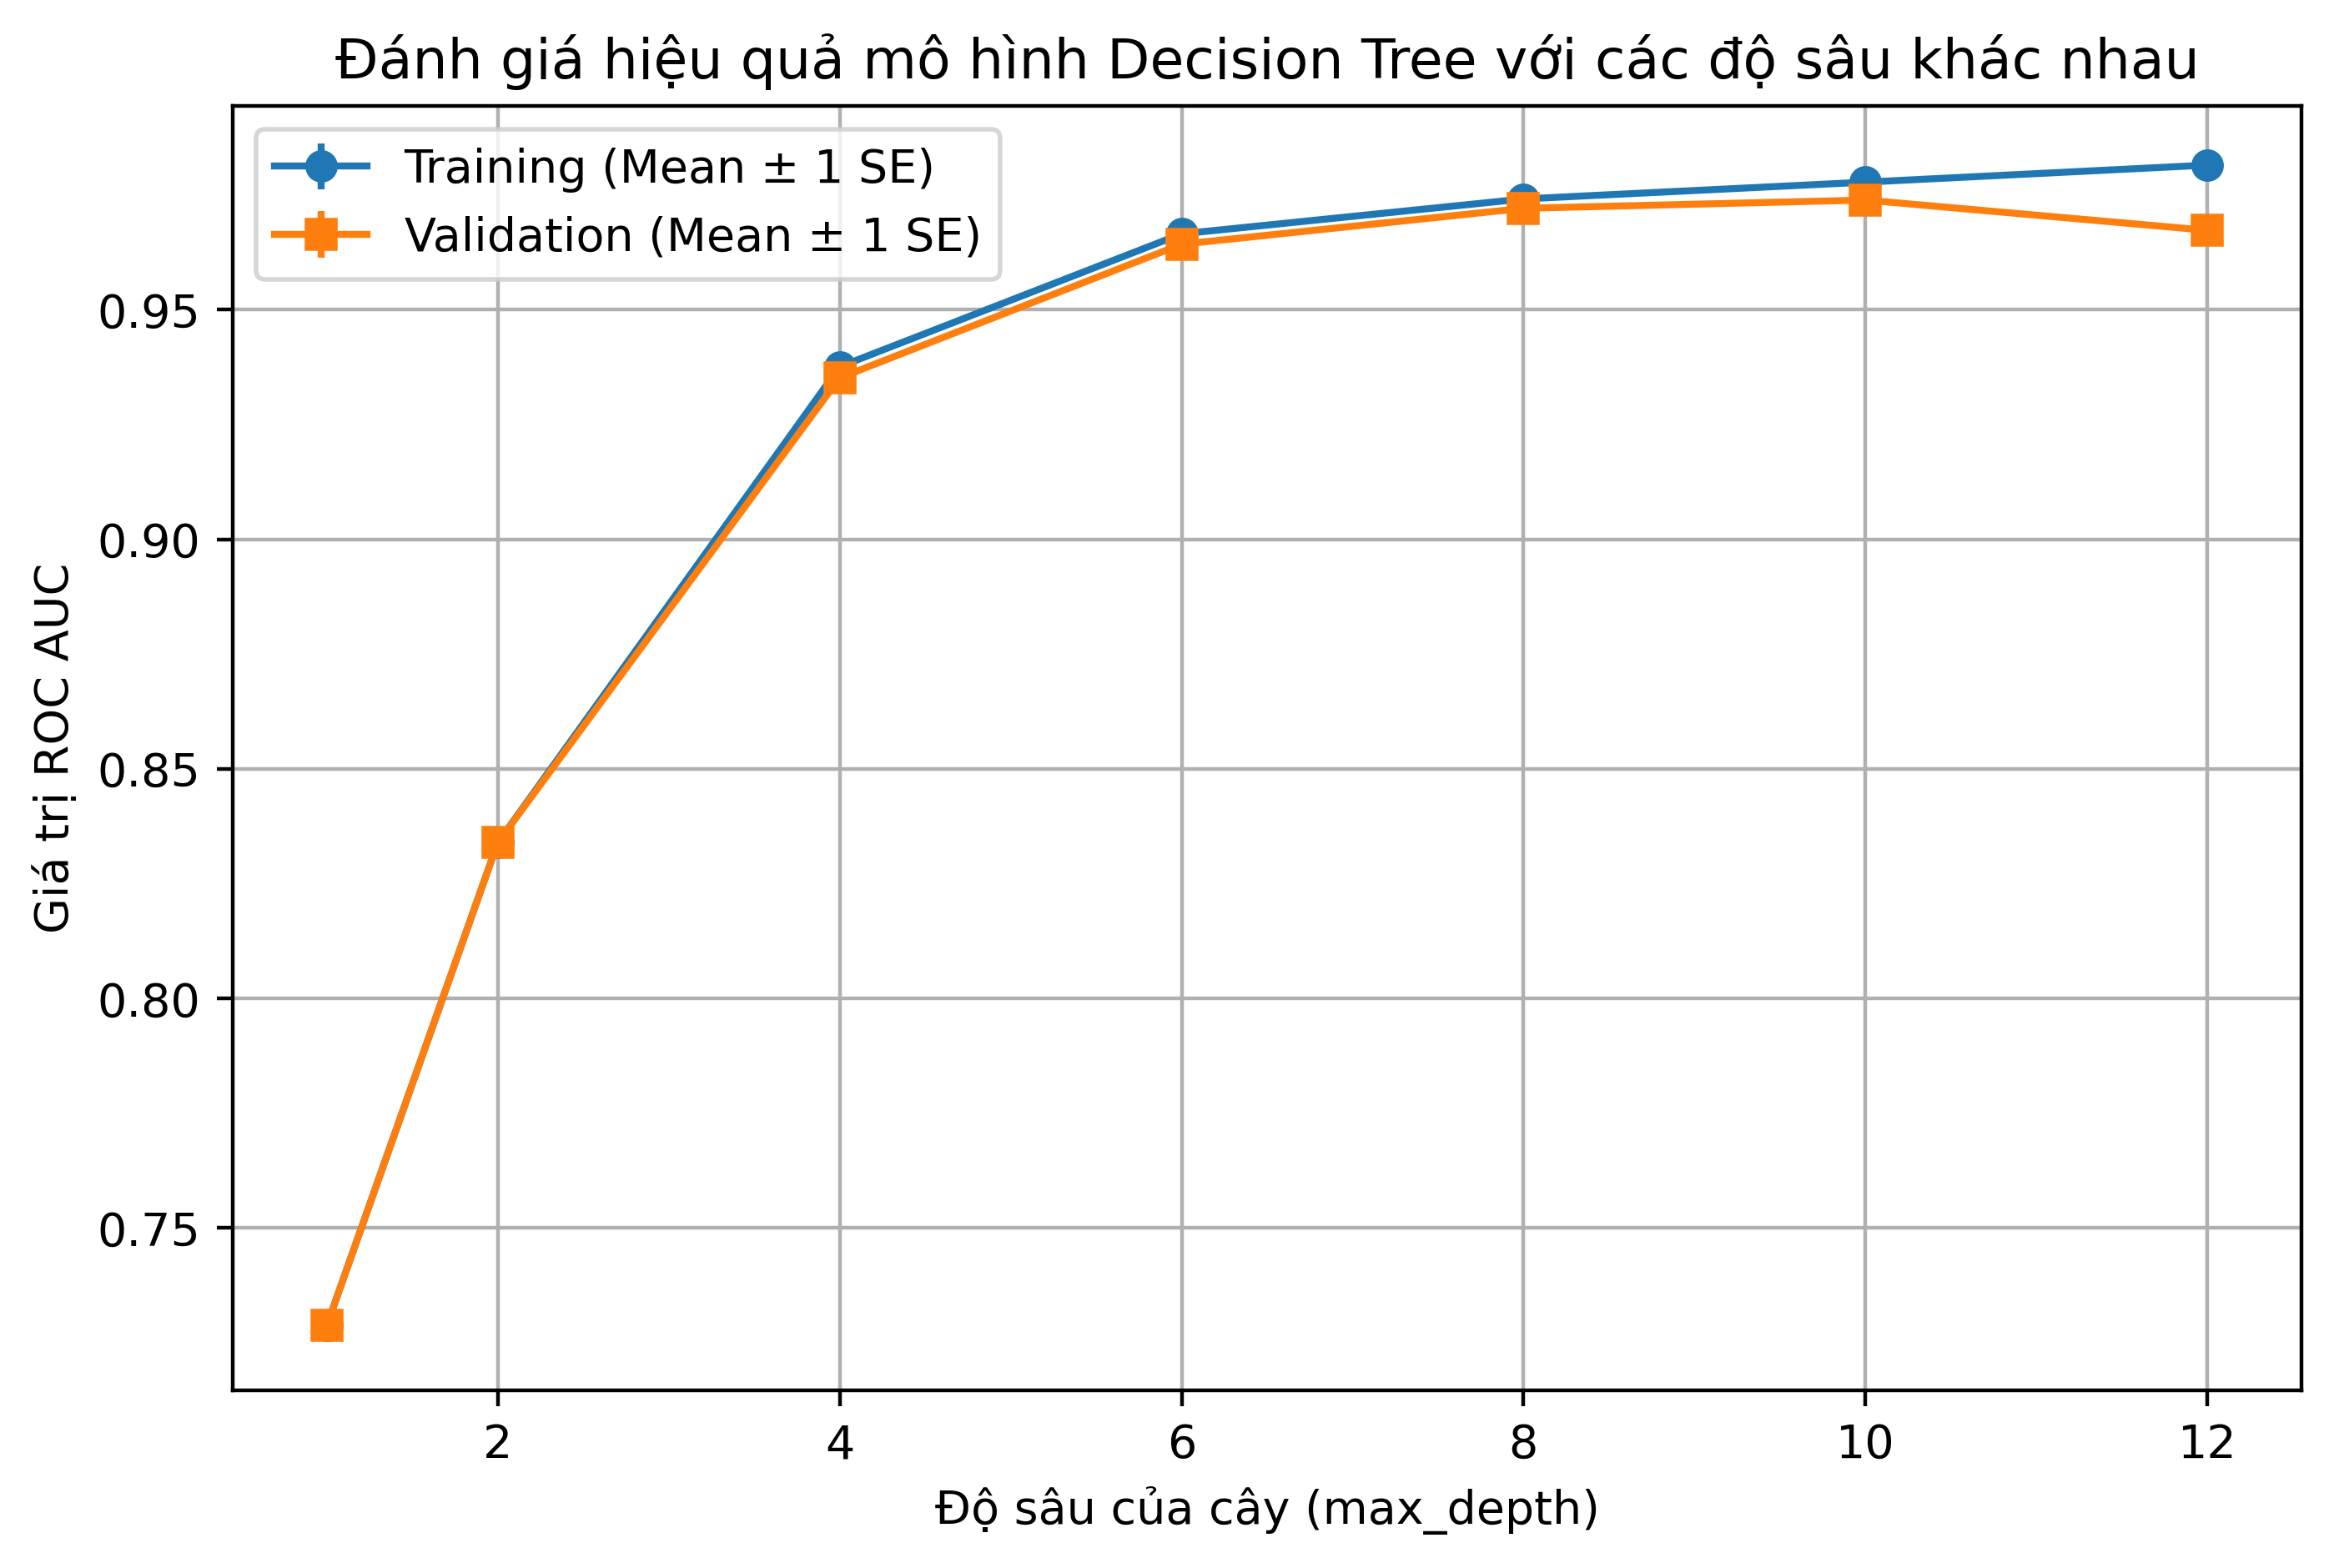

In [8]:
# Chuy·ªÉn k·∫øt qu·∫£ c·ªßa GridSearchCV sang DataFrame
cv_results_df = pd.DataFrame(cv.cv_results_)

# V·∫Ω bi·ªÉu ƒë·ªì so s√°nh hi·ªáu su·∫•t
plt.figure(figsize=(8, 5))
ax = plt.axes()

# ƒê∆∞·ªùng bi·ªÉu di·ªÖn ƒëi·ªÉm train
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_train_score'],
            yerr=cv_results_df['std_train_score'] / np.sqrt(4),
            label='Training (Mean ¬± 1 SE)',
            marker='o')

# ƒê∆∞·ªùng bi·ªÉu di·ªÖn ƒëi·ªÉm test
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_test_score'],
            yerr=cv_results_df['std_test_score'] / np.sqrt(4),
            label='Validation (Mean ¬± 1 SE)',
            marker='s')

# Thi·∫øt l·∫≠p nh√£n
ax.legend()
plt.xlabel('ƒê·ªô s√¢u c·ªßa c√¢y (max_depth)')
plt.ylabel('Gi√° tr·ªã ROC AUC')
plt.title('ƒê√°nh gi√° hi·ªáu qu·∫£ m√¥ h√¨nh Decision Tree v·ªõi c√°c ƒë·ªô s√¢u kh√°c nhau')
plt.grid(True)
plt.show()


üìä Ph√¢n t√≠ch bi·ªÉu ƒë·ªì ƒë√°nh gi√° hi·ªáu qu·∫£ m√¥ h√¨nh C√¢y quy·∫øt ƒë·ªãnh v·ªõi c√°c gi√° tr·ªã max_depth kh√°c nhau


-Khi ƒë·ªô s√¢u c·ªßa c√¢y (max_depth) tƒÉng d·∫ßn t·ª´ 1 ƒë·∫øn 12, gi√° tr·ªã ROC AUC trung b√¨nh tr√™n t·∫≠p hu·∫•n luy·ªán v√† ki·ªÉm tra ƒë·ªÅu tƒÉng r√µ r·ªát, th·ªÉ hi·ªán r·∫±ng m√¥ h√¨nh h·ªçc ƒë∆∞·ª£c nhi·ªÅu th√¥ng tin h∆°n t·ª´ d·ªØ li·ªáu.

    + ·ªû ƒë·ªô s√¢u 1, ƒëi·ªÉm ROC AUC m·ªõi ch·ªâ ƒë·∫°t 0.725, cho th·∫•y m√¥ h√¨nh c√≤n ƒë∆°n gi·∫£n v√† ch∆∞a ƒë·ªß kh·∫£ nƒÉng ph√¢n t√°ch d·ªØ li·ªáu t·ªët.

    + Khi tƒÉng l√™n 4 ho·∫∑c 6, m√¥ h√¨nh ƒë·∫°t AUC kho·∫£ng 0.94‚Äì0.96, ch·ª©ng t·ªè hi·ªáu qu·∫£ ph√¢n lo·∫°i ƒë√£ c·∫£i thi·ªán ƒë√°ng k·ªÉ.

-Gi√° tr·ªã t·ªët nh·∫•t ƒë·∫°t ƒë∆∞·ª£c t·∫°i max_depth = 10, v·ªõi:

    + ƒêi·ªÉm hu·∫•n luy·ªán (train): 0.9778

    + ƒêi·ªÉm ki·ªÉm tra (test): 0.9733

    + ƒê·ªô l·ªách chu·∫©n (std) nh·ªè, cho th·∫•y k·∫øt qu·∫£ ·ªïn ƒë·ªãnh qua c√°c l·∫ßn chia d·ªØ li·ªáu.

-Sau ng∆∞·ª°ng n√†y (max_depth = 12), ƒëi·ªÉm hu·∫•n luy·ªán v·∫´n tƒÉng nh·∫π (0.9813) nh∆∞ng ƒëi·ªÉm ki·ªÉm tra gi·∫£m c√≤n 0.9658, ph·∫£n √°nh hi·ªán t∆∞·ª£ng overfitting b·∫Øt ƒë·∫ßu xu·∫•t hi·ªán ‚Äî m√¥ h√¨nh h·ªçc qu√° chi ti·∫øt v√†o d·ªØ li·ªáu hu·∫•n luy·ªán v√† gi·∫£m kh·∫£ nƒÉng kh√°i qu√°t h√≥a.

üîπ K·∫øt lu·∫≠n:

ƒê·ªô s√¢u 10 l√† l·ª±a ch·ªçn t·ªëi ∆∞u cho c√¢y quy·∫øt ƒë·ªãnh trong b√†i to√°n d·ª± ƒëo√°n b·ªánh ti·ªÉu ƒë∆∞·ªùng, gi√∫p ƒë·∫°t ƒë∆∞·ª£c ƒë·ªô ch√≠nh x√°c cao (ROC AUC ‚âà 0.9733) ƒë·ªìng th·ªùi duy tr√¨ s·ª± c√¢n b·∫±ng gi·ªØa hu·∫•n luy·ªán v√† ki·ªÉm tra.

Bi·ªÉu ƒë·ªì th·ªÉ hi·ªán r√µ xu h∆∞·ªõng tƒÉng hi·ªáu su·∫•t ƒë·∫øn m·ªôt m·ª©c gi·ªõi h·∫°n r·ªìi ·ªïn ƒë·ªãnh ho·∫∑c gi·∫£m nh·∫π, ƒëi·ªÅu n√†y minh h·ªça m·ªëi quan h·ªá ƒë·∫∑c tr∆∞ng gi·ªØa ƒë·ªô ph·ª©c t·∫°p m√¥ h√¨nh v√† kh·∫£ nƒÉng kh√°i qu√°t.

#### Nhi·ªám v·ª• 3: X√¢y d·ª±ng r·ª´ng c√¢y (random forest)

##### 1. T·∫°o r·ª´ng c√¢y v·ªõi l·ªõp RandomForestClassifier trong Scikit-Learn

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# T·∫°o m√¥ h√¨nh Random Forest ban ƒë·∫ßu
rf = RandomForestClassifier(
    n_estimators=10,
    criterion='gini',
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=4,
    bootstrap=True
)


-ƒêo·∫°n m√£ n√†y kh·ªüi t·∫°o m·ªôt m√¥ h√¨nh Random Forest Classifier ‚Äì t·∫≠p h·ª£p nhi·ªÅu c√¢y quy·∫øt ƒë·ªãnh ƒë∆∞·ª£c hu·∫•n luy·ªán song song.

-M·ªói c√¢y h·ªçc t·ª´ m·ªôt t·∫≠p m·∫´u ng·∫´u nhi√™n v√† m√¥ h√¨nh cu·ªëi c√πng s·∫Ω d·ª± ƒëo√°n d·ª±a tr√™n b·ªè phi·∫øu ƒëa s·ªë (voting).
Tham s·ªë ban ƒë·∫ßu g·ªìm:

    n_estimators=10: s·ªë l∆∞·ª£ng c√¢y trong r·ª´ng,
    
    max_depth=3: ƒë·ªô s√¢u t·ªëi ƒëa c·ªßa m·ªói c√¢y,
    
    criterion='gini': ti√™u ch√≠ ƒëo ƒë·ªô thu·∫ßn khi·∫øt t·∫°i m·ªói n√∫t chia.

##### 2.T√¨m tham s·ªë t·ªëi ∆∞u cho m√¥ h√¨nh r·ª´ng c√¢y v√† th·ª±c hi·ªán train v·ªõi tham s·ªë t·ªëi ∆∞u ƒë√≥

In [19]:
# Thi·∫øt l·∫≠p t·∫≠p tham s·ªë c·∫ßn t√¨m
rf_params_ex = {'n_estimators': list(range(10, 110, 10))}

# C·∫•u h√¨nh GridSearchCV
cv_rf_ex = GridSearchCV(
    rf,
    param_grid=rf_params_ex,
    scoring='roc_auc',
    refit=True,
    cv=4,
    verbose=1,
    return_train_score=True
)

# Hu·∫•n luy·ªán m√¥ h√¨nh
cv_rf_ex.fit(X_train, y_train)


Fitting 4 folds for each of 10 candidates, totalling 40 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=3, n_estimators=10,
                                              random_state=4),
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             return_train_score=True, scoring='roc_auc', verbose=1)

M√¥ t·∫£:

-S·ª≠ d·ª•ng GridSearchCV ƒë·ªÉ t√¨m ra s·ªë l∆∞·ª£ng c√¢y (n_estimators) t·ªëi ∆∞u cho m√¥ h√¨nh Random Forest.

-Qu√° tr√¨nh t√¨m ki·∫øm th·ª±c hi·ªán 4-fold cross-validation v√† s·ª≠ d·ª•ng ROC AUC l√†m th∆∞·ªõc ƒëo hi·ªáu su·∫•t.

-M·ª•c ti√™u l√† x√°c ƒë·ªãnh s·ªë l∆∞·ª£ng c√¢y gi√∫p m√¥ h√¨nh ƒë·∫°t hi·ªáu qu·∫£ cao nh·∫•t m√† v·∫´n ƒë·∫£m b·∫£o t·ªëc ƒë·ªô hu·∫•n luy·ªán h·ª£p l√Ω.

##### 3. V·∫Ω bi·ªÉu ƒë·ªì ƒë√°nh gi√° m√¥ h√¨nh r·ª´ng c√¢y v·ªõi c√°c tham s·ªë s·ªë c√¢y c√≥ trong r·ª´ng kh√°c nhau

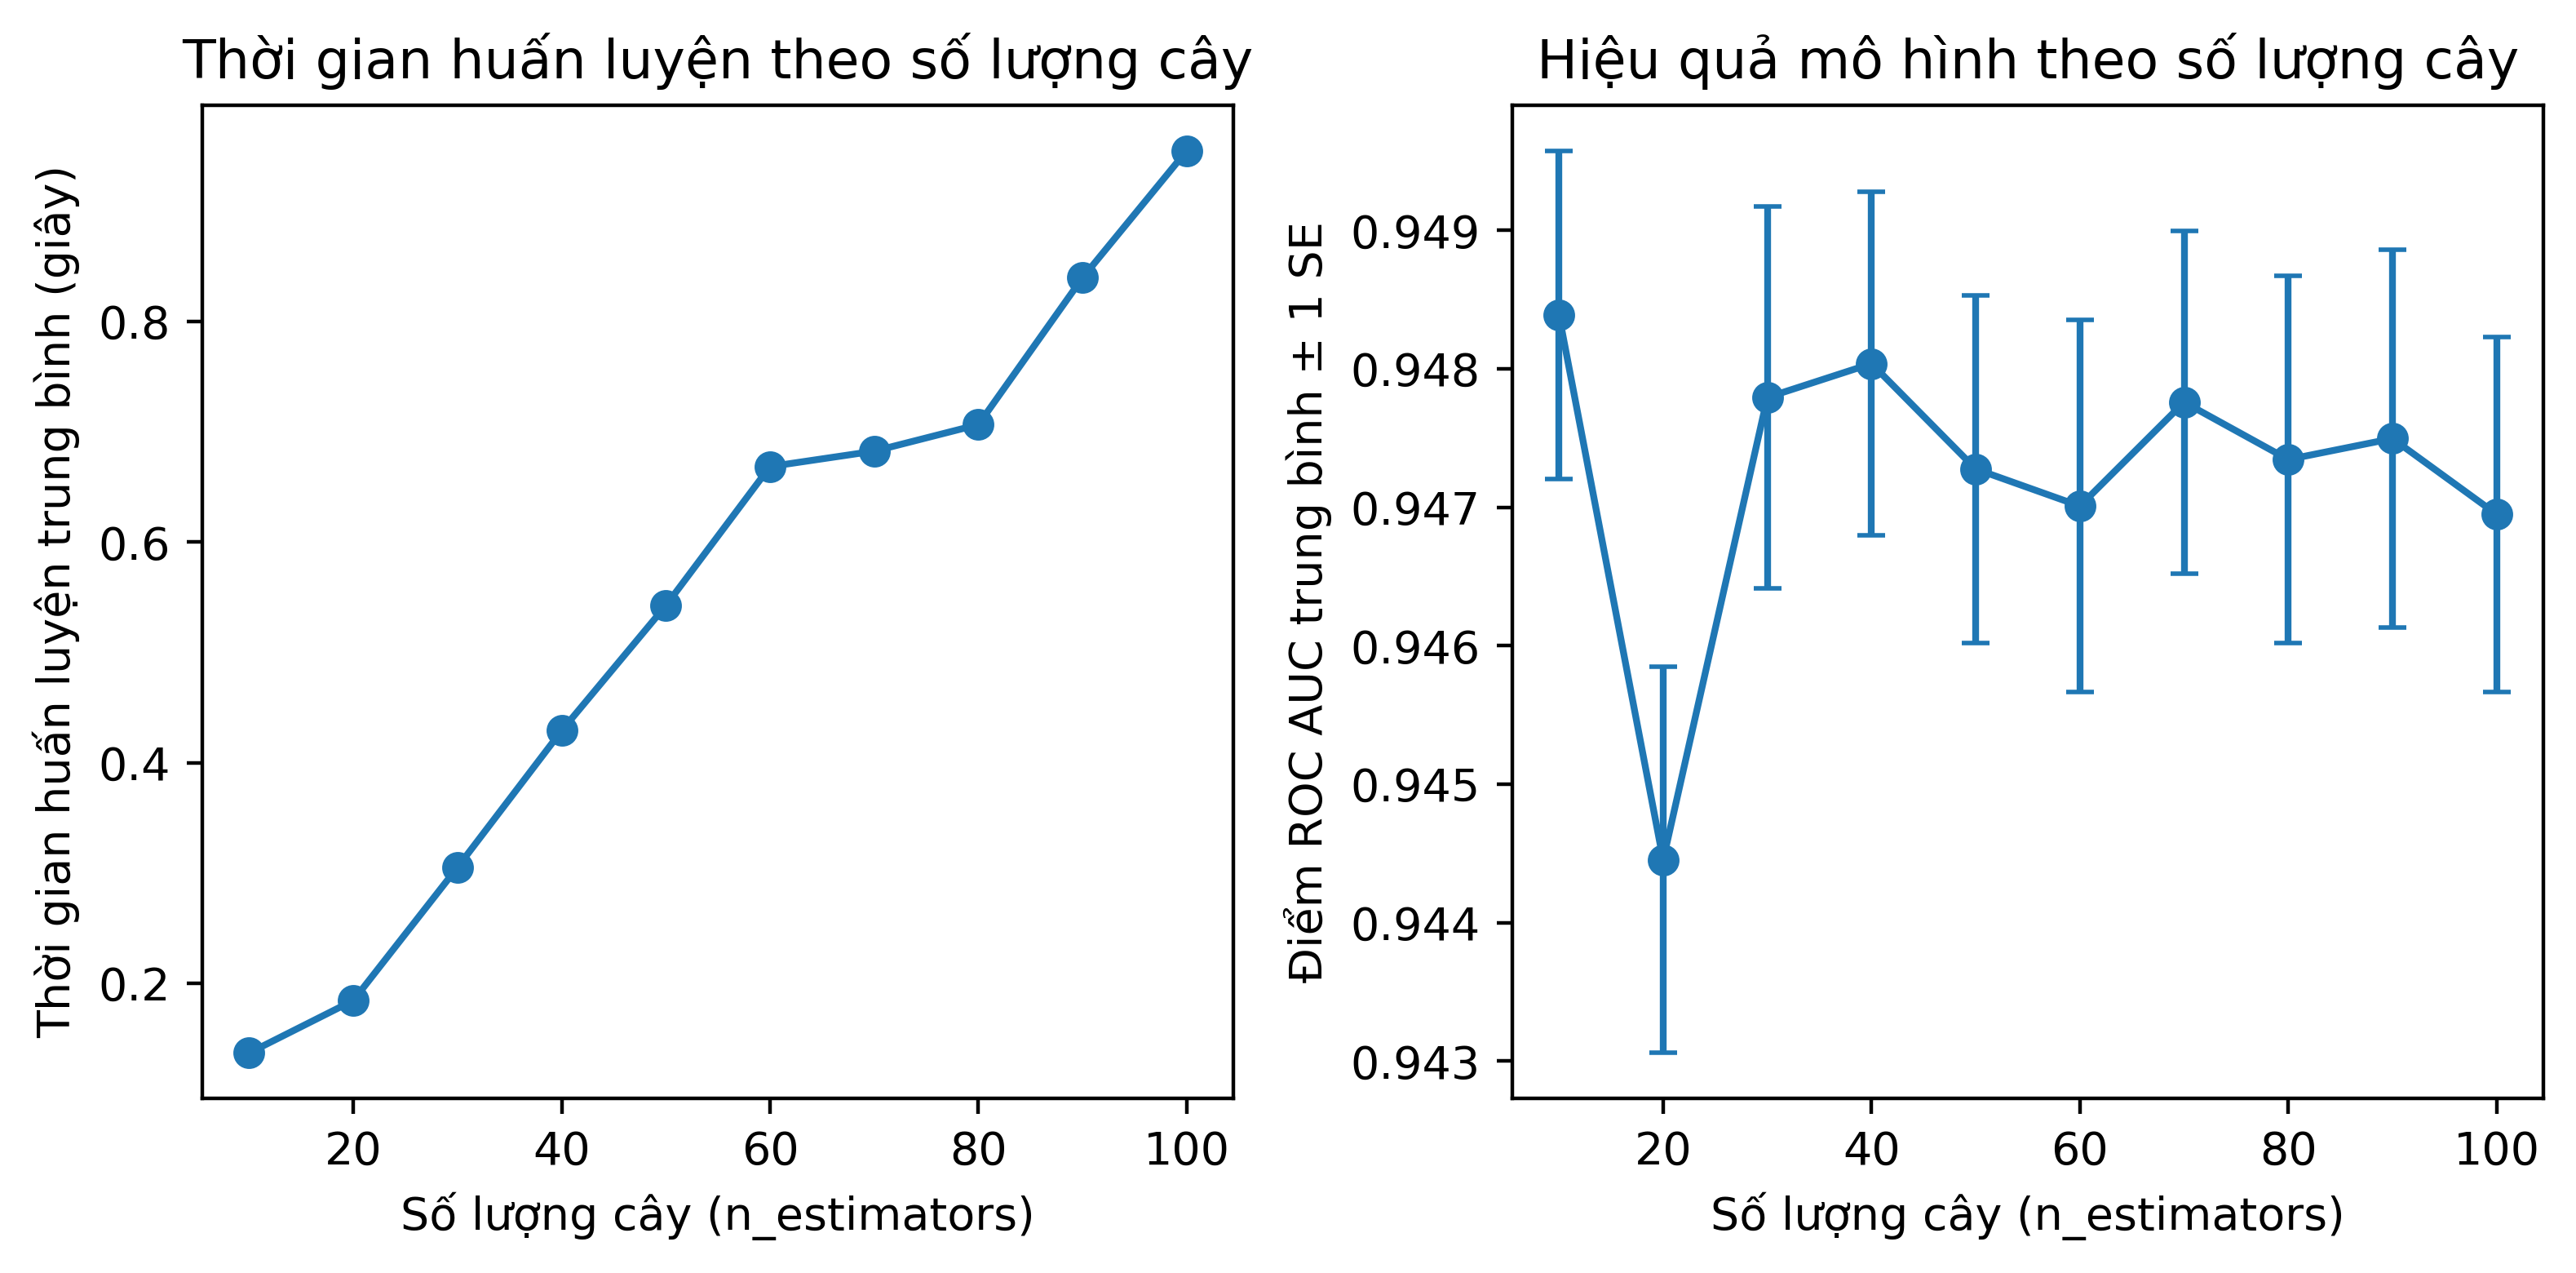

In [20]:
# T·∫°o DataFrame ch·ª©a k·∫øt qu·∫£ hu·∫•n luy·ªán
cv_rf_ex_results_df = pd.DataFrame(cv_rf_ex.cv_results_)

# V·∫Ω bi·ªÉu ƒë·ªì
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# Bi·ªÉu ƒë·ªì th·ªùi gian hu·∫•n luy·ªán
axs[0].plot(cv_rf_ex_results_df['param_n_estimators'],
            cv_rf_ex_results_df['mean_fit_time'], '-o')
axs[0].set_xlabel('S·ªë l∆∞·ª£ng c√¢y (n_estimators)')
axs[0].set_ylabel('Th·ªùi gian hu·∫•n luy·ªán trung b√¨nh (gi√¢y)')
axs[0].set_title('Th·ªùi gian hu·∫•n luy·ªán theo s·ªë l∆∞·ª£ng c√¢y')

# Bi·ªÉu ƒë·ªì ƒëi·ªÉm ROC AUC
axs[1].errorbar(cv_rf_ex_results_df['param_n_estimators'],
                cv_rf_ex_results_df['mean_test_score'],
                yerr=cv_rf_ex_results_df['std_test_score']/np.sqrt(4),
                fmt='-o', capsize=3)
axs[1].set_xlabel('S·ªë l∆∞·ª£ng c√¢y (n_estimators)')
axs[1].set_ylabel('ƒêi·ªÉm ROC AUC trung b√¨nh ¬± 1 SE')
axs[1].set_title('Hi·ªáu qu·∫£ m√¥ h√¨nh theo s·ªë l∆∞·ª£ng c√¢y')

plt.tight_layout()
plt.show()


Bi·ªÉu ƒë·ªì 1: Th·ªùi gian hu·∫•n luy·ªán theo s·ªë l∆∞·ª£ng c√¢y

    Th·ªùi gian hu·∫•n luy·ªán tƒÉng g·∫ßn tuy·∫øn t√≠nh theo s·ªë l∆∞·ª£ng c√¢y trong r·ª´ng.
    
    Khi tƒÉng s·ªë c√¢y t·ª´ 10 ‚Üí 100, th·ªùi gian hu·∫•n luy·ªán tƒÉng kho·∫£ng 7 l·∫ßn (t·ª´ 0.14s l√™n 0.95s).
    
    ƒê·ªô l·ªách chu·∫©n c·ªßa th·ªùi gian hu·∫•n luy·ªán nh·ªè, cho th·∫•y qu√° tr√¨nh hu·∫•n luy·ªán ·ªïn ƒë·ªãnh v√† c√≥ t√≠nh l·∫∑p l·∫°i cao.

Bi·ªÉu ƒë·ªì 2: Hi·ªáu qu·∫£ m√¥ h√¨nh (ROC AUC) theo s·ªë l∆∞·ª£ng c√¢y

    M·ª©c ROC AUC dao ƒë·ªông quanh 0.947 ‚Äì 0.948, th·ªÉ hi·ªán m√¥ h√¨nh ·ªïn ƒë·ªãnh v√† c√≥ hi·ªáu qu·∫£ cao.
    
    Sau m·ªëc 30‚Äì40 c√¢y, ƒëi·ªÉm ROC AUC h·∫ßu nh∆∞ kh√¥ng tƒÉng th√™m, m·∫∑c d√π th·ªùi gian hu·∫•n luy·ªán ti·∫øp t·ª•c tƒÉng.
    
    ƒêi·ªÅu n√†y cho th·∫•y m√¥ h√¨nh ƒë√£ ƒë·∫°t m·ª©c h·ªôi t·ª•, vi·ªác tƒÉng th√™m s·ªë l∆∞·ª£ng c√¢y ch·ªâ tƒÉng chi ph√≠ t√≠nh to√°n m√† kh√¥ng c·∫£i thi·ªán hi·ªáu su·∫•t ƒë√°ng k·ªÉ.

T·ªïng k·∫øt

    M√¥ h√¨nh Random Forest ƒë·∫°t hi·ªáu qu·∫£ t·ªët v·ªõi ROC AUC ‚âà 0.95.
    
    TƒÉng s·ªë l∆∞·ª£ng c√¢y gi√∫p gi·∫£m sai s·ªë ng·∫´u nhi√™n, nh∆∞ng hi·ªáu qu·∫£ c·∫£i thi·ªán kh√¥ng ƒë√°ng k·ªÉ sau ng∆∞·ª°ng kho·∫£ng 50 c√¢y.
    
    ƒê·ªÅ xu·∫•t: Ch·ªçn n_estimators = 40 ho·∫∑c 50 ƒë·ªÉ c√¢n b·∫±ng gi·ªØa hi·ªáu nƒÉng v√† t·ªëc ƒë·ªô hu·∫•n luy·ªán.

##### 4. Xem tham s·ªë t·ªët nh·∫•t c·ªßa r·ª´ng c√¢y, xem m·ª©c ƒë·ªô quan tr·ªçng c·ªßa t·ª´ng feature trong m√¥ h√¨nh v·ªõi tham s·ªë t·ªët nh·∫•t

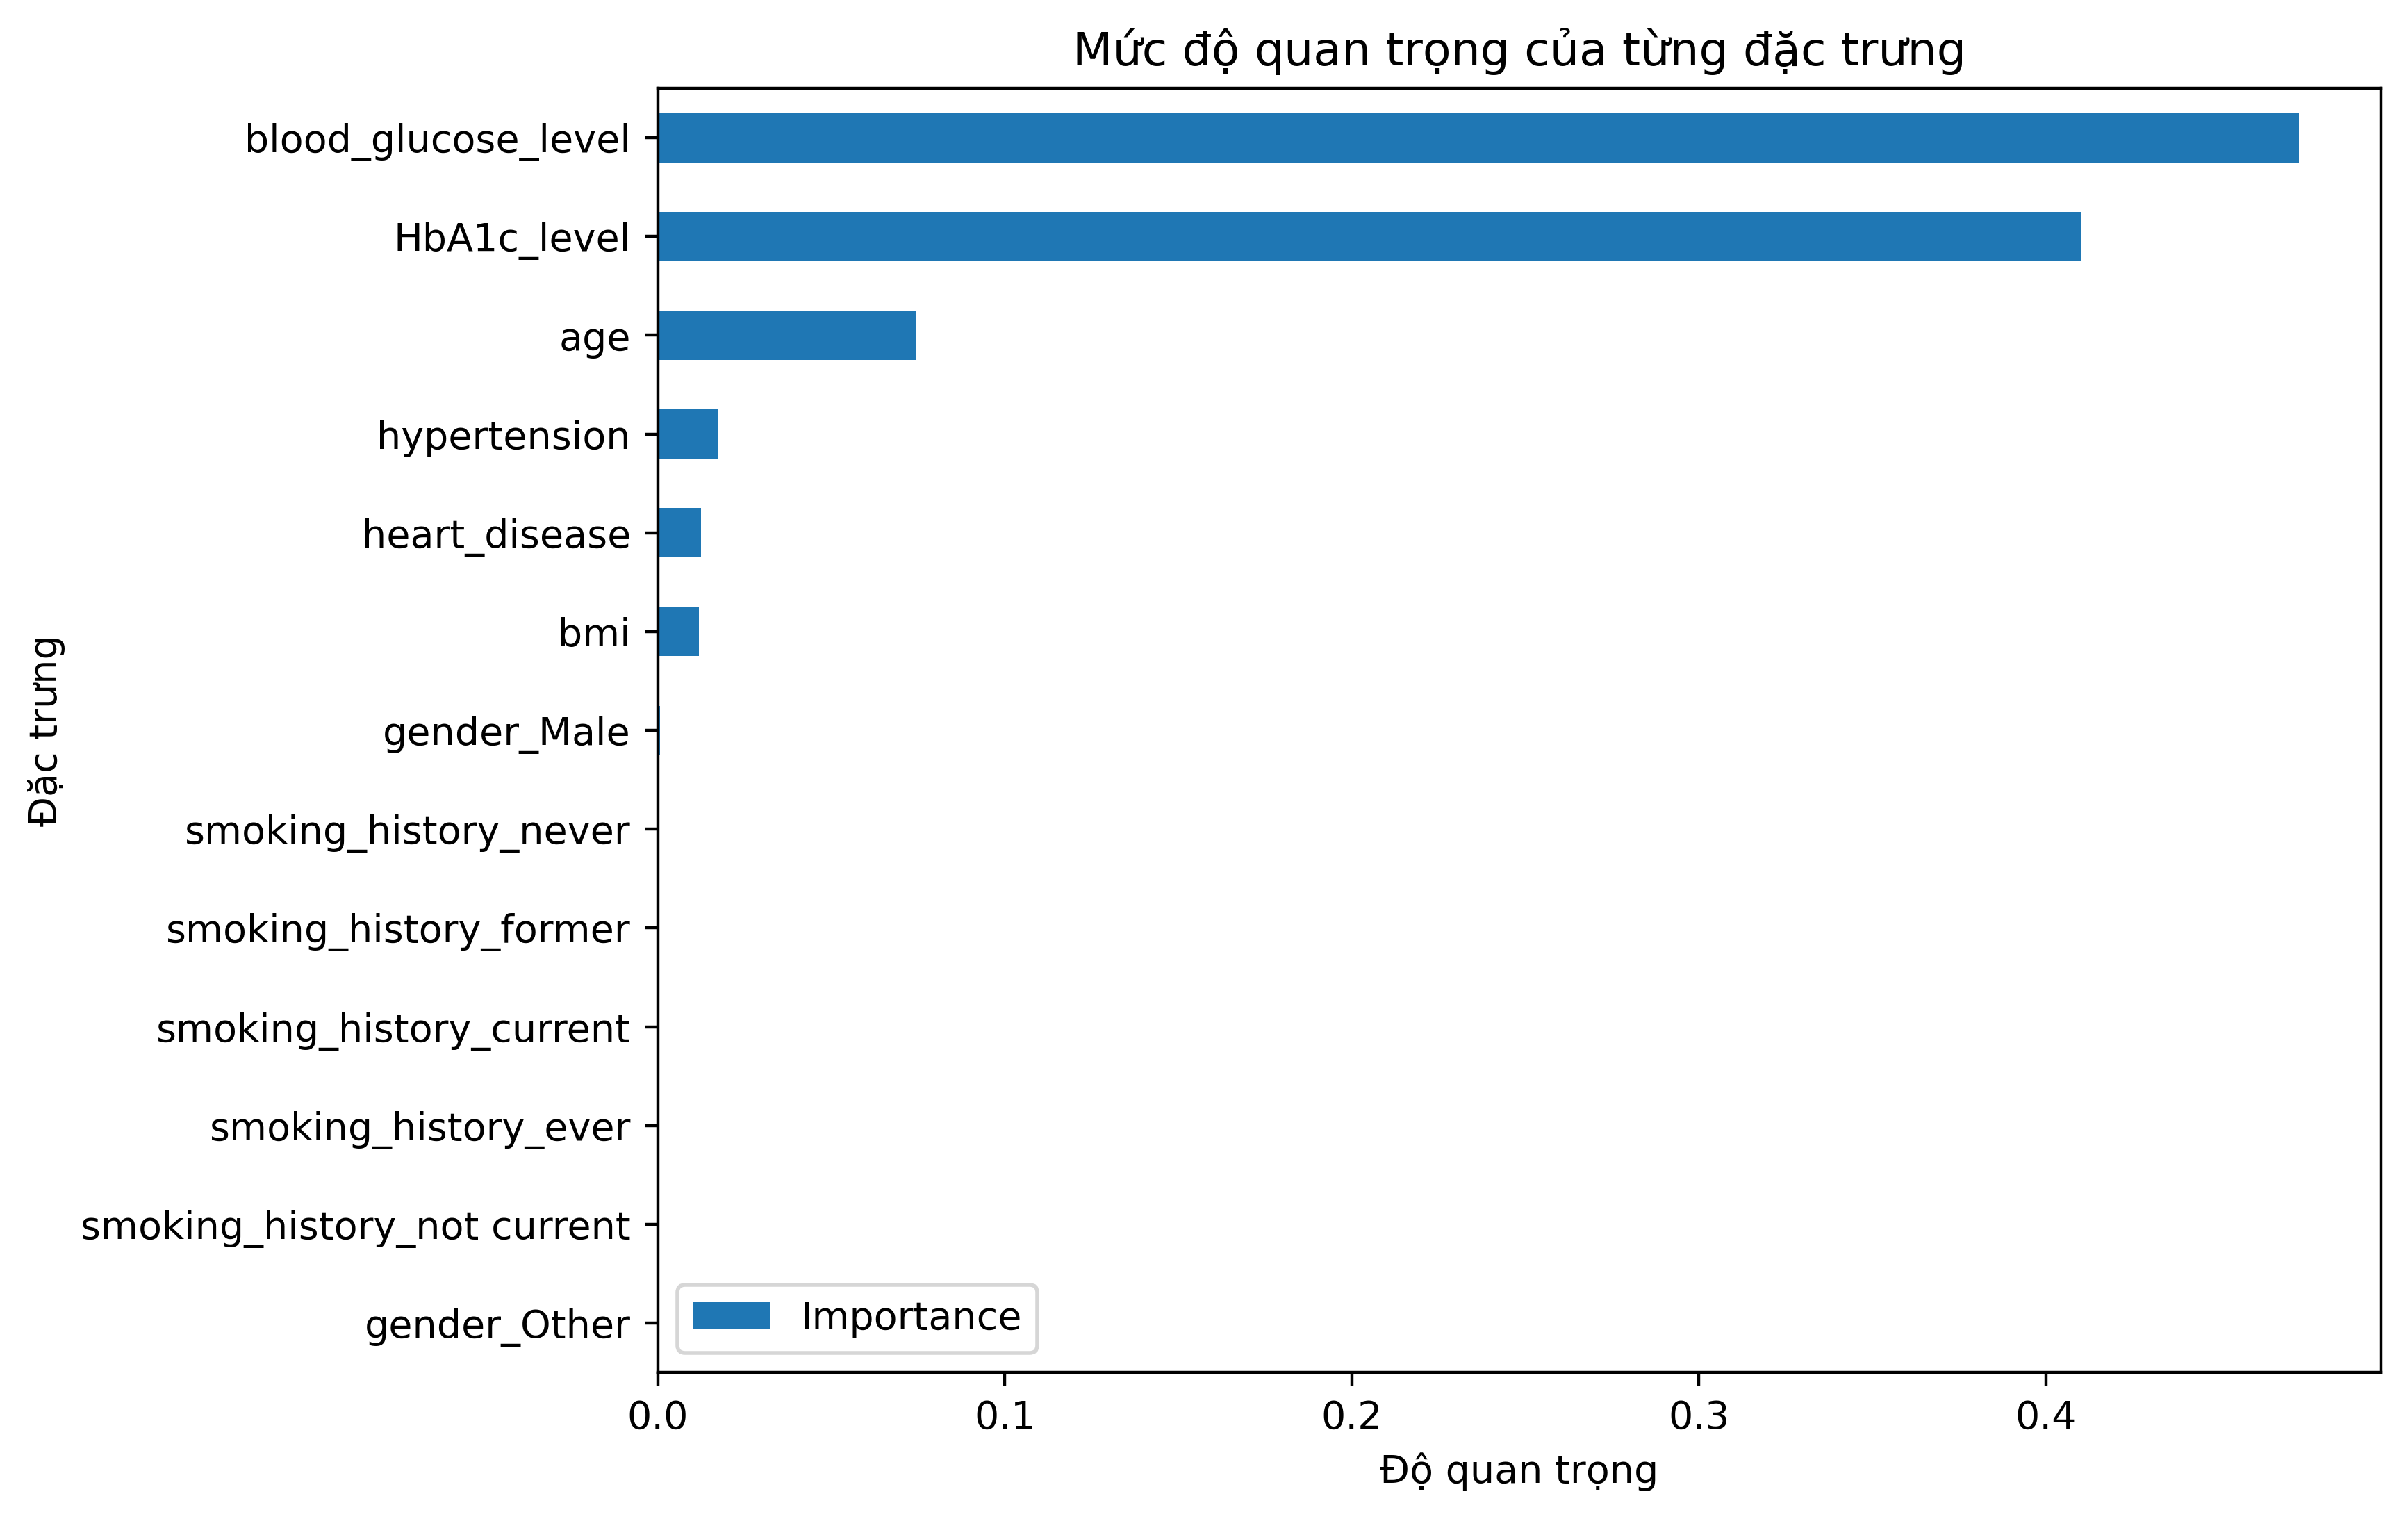

In [22]:
# N·∫øu b·∫°n ƒëang d√πng dataset diabetes_prediction_dataset.csv
features = X_train.columns if isinstance(X_train, pd.DataFrame) else df.columns[:-1]

# L·∫•y ƒë·ªô quan tr·ªçng c·ªßa t·ª´ng feature
feat_imp_df = pd.DataFrame({
    'Importance': cv_rf_ex.best_estimator_.feature_importances_
}, index=features)

# V·∫Ω bi·ªÉu ƒë·ªì m·ª©c ƒë·ªô quan tr·ªçng
feat_imp_df.sort_values('Importance', ascending=True).plot.barh(
    figsize=(8, 6),
    title='M·ª©c ƒë·ªô quan tr·ªçng c·ªßa t·ª´ng ƒë·∫∑c tr∆∞ng'
)
plt.xlabel('ƒê·ªô quan tr·ªçng')
plt.ylabel('ƒê·∫∑c tr∆∞ng')
plt.show()


-Nh√¨n chung, c√°c y·∫øu t·ªë li√™n quan tr·ª±c ti·∫øp ƒë·∫øn ƒë∆∞·ªùng huy·∫øt bao g·ªìm blood_glucose_level v√† HbA1c_level chi·∫øm t·ª∑ tr·ªçng cao nh·∫•t, l·∫ßn l∆∞·ª£t kho·∫£ng 47% v√† 41%. ƒêi·ªÅu n√†y ph·∫£n √°nh ƒë√∫ng b·∫£n ch·∫•t y h·ªçc c·ªßa b·ªánh ti·ªÉu ƒë∆∞·ªùng, khi ch·ªâ s·ªë ƒë∆∞·ªùng huy·∫øt v√† HbA1c l√† hai y·∫øu t·ªë ch√≠nh ƒë·ªÉ x√°c ƒë·ªãnh t√¨nh tr·∫°ng b·ªánh.

-Ti·∫øp theo l√† y·∫øu t·ªë age (tu·ªïi) v·ªõi m·ª©c ·∫£nh h∆∞·ªüng trung b√¨nh (0.074), cho th·∫•y tu·ªïi t√°c c√≥ m·ªëi t∆∞∆°ng quan nh·∫•t ƒë·ªãnh v·ªõi kh·∫£ nƒÉng m·∫Øc b·ªánh. C√°c ƒë·∫∑c tr∆∞ng kh√°c nh∆∞ hypertension (cao huy·∫øt √°p), heart_disease (b·ªánh tim) v√† bmi (ch·ªâ s·ªë kh·ªëi c∆° th·ªÉ) c√≥ ƒë·ªô quan tr·ªçng nh·ªè h∆°n, th·ªÉ hi·ªán vai tr√≤ gi√°n ti·∫øp trong d·ª± ƒëo√°n.

-Ng∆∞·ª£c l·∫°i, c√°c y·∫øu t·ªë li√™n quan ƒë·∫øn gi·ªõi t√≠nh v√† th√≥i quen h√∫t thu·ªëc c√≥ gi√° tr·ªã g·∫ßn b·∫±ng 0, cho th·∫•y √≠t ·∫£nh h∆∞·ªüng ƒë√°ng k·ªÉ ƒë·∫øn k·∫øt qu·∫£ ph√¢n lo·∫°i trong b·ªô d·ªØ li·ªáu n√†y.

*K·∫øt lu·∫≠n:M√¥ h√¨nh Random Forest cho th·∫•y ƒë∆∞·ªùng huy·∫øt v√† HbA1c l√† hai y·∫øu t·ªë quy·∫øt ƒë·ªãnh ch√≠nh trong vi·ªác d·ª± ƒëo√°n nguy c∆° ti·ªÉu ƒë∆∞·ªùng. C√°c y·∫øu t·ªë nh√¢n kh·∫©u h·ªçc v√† th√≥i quen sinh ho·∫°t ch·ªâ ƒë√≥ng vai tr√≤ b·ªï tr·ª£, kh√¥ng c√≥ t√°c ƒë·ªông m·∫°nh ƒë·∫øn k·∫øt qu·∫£ cu·ªëi c√πng.
    
    

# 2.2. GI·∫¢I THU·∫¨T 2: SUPPORT VECTOR MACHINE (SVM)

## 2.2.2 B√†i l√†m m·∫´u

### B√†i to√°n 1: Th·ª±c hi·ªán c√°c nhi·ªám v·ª• trong b√†i to√°n 1 ƒë·ªÉ x√¢y d·ª±ng m√¥ h√¨nh v·ªõi gi·∫£i thu·∫≠t SVM cho d·ªØ li·ªáu Iris-data l·∫•y t·ª´ https://www.kaggle.com/code/xvivancos/tutorial-knn-in-the-iris-data-set

#### Nhi·ªám v·ª• 1: X√¢y d·ª±ng m√¥ h√¨nh SVM ƒë·ªÉ ph√¢n lo·∫°i c√°c lo√†i hoa c·∫©m ch∆∞·ªõng
B·ªô d·ªØ li·ªáu **Iris** l√† m·ªôt t·∫≠p d·ªØ li·ªáu c·ªï ƒëi·ªÉn g·ªìm 150 m·∫´u c·ªßa ba lo√†i hoa: *Setosa*, *Versicolor*, v√† *Virginica*.  
M·ªói m·∫´u c√≥ 4 ƒë·∫∑c tr∆∞ng: chi·ªÅu d√†i v√† chi·ªÅu r·ªông c·ªßa ƒë√†i hoa (sepal) v√† c√°nh hoa (petal).  
M·ª•c ti√™u l√† x√¢y d·ª±ng m√¥ h√¨nh **SVM** ƒë·ªÉ d·ª± ƒëo√°n lo√†i hoa d·ª±a tr√™n 4 ƒë·∫∑c tr∆∞ng n√†y.


##### 1. T·∫£i d·ªØ li·ªáu v·ªÅ, n·∫°p d·ªØ li·ªáu, xem th√¥ng tin c√°c feature c√≥ trong t·∫≠p d·ªØ li·ªáu v√† chu·∫©n b·ªã d·ªØ li·ªáu cho x√¢y d·ª±ng m√¥ h√¨nh

In [18]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
# Download&Load d·ªØ li·ªáu iris t·ª´ datasets c·ªßa scikit-learn
iris = datasets.load_iris()
# Hi·ªÉn th·ªã m√¥ ta d·ªØ li·ªáu, ch·ªâ c√≥ trong c√°c b·ªô d·ªØ li·ªáu chu·∫©n v√† m·ªü ƒë·ªÉ h·ªçc t·∫≠p v√† nghi√™n c·ª©u
print(iris.DESCR)
# T·ª´ t·∫≠p d·ªØ li·ªáu ban ƒë·∫ßu, t√°ch l·∫•y ma tr·∫≠n bi·ªÉu di·ªÖn c√°c ƒë·∫∑c tr∆∞ng v√†nh√£n.
data = iris.data
target = iris.target
# TODO: Chia d·ªØ li·ªáu v√† nh√£n th√†nh 2 t·∫≠p d·ªØ li·ªáu hu·∫•n luy·ªán v√† d·ªØ li·ªáuki·ªÉm tra theo t·ªâ l·ªá 80:20
X_train, X_test, y_train, y_test = train_test_split(data, target,
test_size
= 0.2, random_state=101)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

T·∫≠p d·ªØ li·ªáu **Iris** l√† m·ªôt trong nh·ªØng b·ªô d·ªØ li·ªáu kinh ƒëi·ªÉn v√† ph·ªï bi·∫øn nh·∫•t trong lƒ©nh v·ª±c **h·ªçc m√°y** v√† **nh·∫≠n d·∫°ng m·∫´u**. D·ªØ li·ªáu bao g·ªìm **150 m·∫´u**, ƒë∆∞·ª£c chia ƒë·ªÅu cho **ba lo√†i hoa**: *Iris-setosa*, *Iris-versicolour* v√† *Iris-virginica*, m·ªói lo√†i chi·∫øm **33,3% t·ªïng s·ªë m·∫´u**.  

M·ªói m·∫´u ƒë∆∞·ª£c m√¥ t·∫£ b·∫±ng **4 thu·ªôc t√≠nh ƒë·ªãnh l∆∞·ª£ng**:
- **Chi·ªÅu d√†i ƒë√†i hoa (sepal length)**  
- **Chi·ªÅu r·ªông ƒë√†i hoa (sepal width)**  
- **Chi·ªÅu d√†i c√°nh hoa (petal length)**  
- **Chi·ªÅu r·ªông c√°nh hoa (petal width)**  

Trong ƒë√≥, hai ƒë·∫∑c tr∆∞ng v·ªÅ **c√°nh hoa (petal)** th·ªÉ hi·ªán **m·ª©c ƒë·ªô t∆∞∆°ng quan cao nh·∫•t v·ªõi nh√£n l·ªõp** (h·ªá s·ªë t∆∞∆°ng quan l·∫ßn l∆∞·ª£t l√† *0.9490* v√† *0.9565*), cho th·∫•y ch√∫ng ƒë√≥ng vai tr√≤ **ph√¢n bi·ªát r√µ r√†ng** gi·ªØa c√°c lo√†i hoa.  
Ng∆∞·ª£c l·∫°i, **ƒë√†i hoa (sepal)** c√≥ m·ª©c t∆∞∆°ng quan th·∫•p h∆°n, nghƒ©a l√† kh·∫£ nƒÉng ph√¢n t√°ch gi·ªØa c√°c l·ªõp d·ª±a v√†o hai ƒë·∫∑c tr∆∞ng n√†y k√©m h∆°n.  

T·∫≠p d·ªØ li·ªáu **kh√¥ng c√≥ gi√° tr·ªã b·ªã thi·∫øu**, ƒë∆∞·ª£c thu th·∫≠p v√† c√¥ng b·ªë b·ªüi **R.A. Fisher** ‚Äì ng∆∞·ªùi ti√™n phong trong lƒ©nh v·ª±c th·ªëng k√™ v√† ph√¢n lo·∫°i.  
ƒê·∫∑c bi·ªát, ch·ªâ c√≥ **Iris-setosa** l√† l·ªõp **ph√¢n t√°ch tuy·∫øn t√≠nh r√µ r√†ng** so v·ªõi hai l·ªõp c√≤n l·∫°i, trong khi **Iris-versicolour** v√† **Iris-virginica** **kh√¥ng tuy·∫øn t√≠nh t√°ch bi·ªát ho√†n to√†n**, khi·∫øn b√†i to√°n tr·ªü n√™n ph√π h·ª£p cho c√°c m√¥ h√¨nh **SVM** (Support Vector Machine) ƒë·ªÉ t√¨m ranh gi·ªõi phi tuy·∫øn t·ªëi ∆∞u.  

T·ªïng th·ªÉ, Iris l√† b·ªô d·ªØ li·ªáu nh·ªè g·ªçn, s·∫°ch v√† c√¢n b·∫±ng, r·∫•t ph√π h·ª£p cho vi·ªác **th·ª±c nghi·ªám, hu·∫•n luy·ªán v√† ƒë√°nh gi√° c√°c thu·∫≠t to√°n ph√¢n lo·∫°i c∆° b·∫£n**.

##### 2. T·∫°o m√¥ h√¨nh SVM v·ªõi d·ªØ li·ªáu ƒë√£ chu·∫©n b·ªã

In [19]:
from sklearn import svm
# kh·ªüi t·∫°o m√¥ h√¨nh ph√¢n l·ªõp
clf = svm.SVC()
# S·ª≠ d·ª•ng ph∆∞∆°ng th·ª©c 'fit' ƒë·ªÉ hu·∫•n luy·ªán m√¥ h√¨nh v·ªõi d·ªØ li·ªáu hu·∫•n luy·ªán v√† nh√£n hu·∫•n luy·ªán
# fit (X,Y) v·ªõi X l√† t·∫≠p c√°c ƒë·ªëi t∆∞·ª£ng, Y l√† t·∫≠p nh√£n t∆∞∆°ng ·ª©ng c·ªßa ƒë·ªëi t∆∞·ª£ng.
clf.fit(X_train, y_train)

SVC()

M√¥ h√¨nh SVM m·∫∑c ƒë·ªãnh ƒë∆∞·ª£c hu·∫•n luy·ªán v·ªõi **kernel RBF**, gi√∫p ph√¢n chia d·ªØ li·ªáu kh√¥ng tuy·∫øn t√≠nh trong kh√¥ng gian ƒë·∫∑c tr∆∞ng cao h∆°n.


##### 3. ƒê√°nh gi√° ƒë·ªô ch√≠nh x√°c c·ªßa m√¥ h√¨nh

In [20]:
# T√≠nh ƒë·ªô ch√≠nh x√°c tr√™n t·∫≠p hu·∫•n luy·ªán v√† t·∫≠p ki·ªÉm tra
train_acc = clf.score(X_train,y_train)
val_acc = clf.score(X_test,y_test)
print('Training accuracy: {}'.format(train_acc))
print('Validation accuracy: {}'.format(val_acc))

Training accuracy: 0.95
Validation accuracy: 0.9666666666666667


K·∫øt qu·∫£ hu·∫•n luy·ªán cho th·∫•y m√¥ h√¨nh ƒë·∫°t **ƒë·ªô ch√≠nh x√°c 95% tr√™n t·∫≠p hu·∫•n luy·ªán** v√† **96.67% tr√™n t·∫≠p ki·ªÉm tra**.  
S·ª± ch√™nh l·ªách nh·ªè gi·ªØa hai gi√° tr·ªã n√†y cho th·∫•y m√¥ h√¨nh **t·ªïng qu√°t h√≥a t·ªët**, c√≥ kh·∫£ nƒÉng nh·∫≠n d·∫°ng ch√≠nh x√°c c√°c m·∫´u ch∆∞a t·ª´ng th·∫•y trong qu√° tr√¨nh h·ªçc.  

ƒêi·ªÅu n√†y ch·ª©ng t·ªè r·∫±ng m√¥ h√¨nh **kh√¥ng b·ªã hi·ªán t∆∞·ª£ng qu√° kh·ªõp (overfitting)** ‚Äì t·ª©c l√† kh√¥ng ch·ªâ h·ªçc thu·ªôc d·ªØ li·ªáu hu·∫•n luy·ªán m√† c√≤n n·∫Øm b·∫Øt ƒë∆∞·ª£c c√°c ƒë·∫∑c tr∆∞ng c·ªët l√µi c·ªßa b√†i to√°n.  
V·ªõi ƒë·ªô ch√≠nh x√°c ki·ªÉm tra cao h∆°n c·∫£ hu·∫•n luy·ªán, m√¥ h√¨nh SVM ƒëang ho·∫°t ƒë·ªông ·ªïn ƒë·ªãnh v√† c√≥ kh·∫£ nƒÉng **ph√¢n bi·ªát hi·ªáu qu·∫£ gi·ªØa c√°c lo√†i hoa trong b·ªô d·ªØ li·ªáu Iris**.  

K·∫øt qu·∫£ n√†y c≈©ng ph·∫£n √°nh ƒë·∫∑c ƒëi·ªÉm c·ªßa **thu·∫≠t to√°n SVM (Support Vector Machine)** ‚Äì m·ªôt ph∆∞∆°ng ph√°p m·∫°nh m·∫Ω trong vi·ªác t√¨m ranh gi·ªõi ph√¢n t√°ch t·ªëi ∆∞u gi·ªØa c√°c l·ªõp d·ªØ li·ªáu.  
Nh·ªù v√†o c∆° ch·∫ø **t·ªëi ƒëa h√≥a kho·∫£ng c√°ch (margin)** gi·ªØa c√°c l·ªõp, m√¥ h√¨nh ƒë·∫°t hi·ªáu su·∫•t t·ªët ngay c·∫£ khi kh√¥ng c·∫ßn tinh ch·ªânh nhi·ªÅu tham s·ªë.  


##### 4. T√¨m tham s·ªë kernel t·ªëi ∆∞u cho m√¥ h√¨nh SVM

In [21]:
# best_svm, best_val_acc v√† best_kernel l·∫ßn l∆∞·ª£t l√† c√°c bi·∫øn l∆∞u m√¥ h√¨nh t·ªët nh·∫•t,
# ƒë·ªô ch√≠nh x√°c cao nh·∫•t tr√™n t·∫≠p ki·ªÉm tra v√† kernel t·ªët nh·∫•t
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
best_svm = None
best_val_acc = -1
best_kernel = None
# Hu·∫•n luy·ªán c√°c m√¥ h√¨nh d·ª±a tr√™n d·ªØ li·ªáu hu·∫•n luy·ªán v√† tham s·ªë kernel
# T√≠nh to√°n ƒë·ªô ch√≠nh x√°c tr√™n t·∫≠p hu·∫•n luy·ªán v√† t·∫≠p ki·ªÉm tra ƒë·ªÉ t√¨m ƒë∆∞·ª£c m√¥ h√¨nh t·ªët nh·∫•t
for i in range(4):
    clf = svm.SVC(kernel=kernels[i], probability=True)
    clf.fit(X_train, y_train)
    tmp_val_acc = clf.score(X_test, y_test)
    if (tmp_val_acc > best_val_acc):
        best_val_acc = tmp_val_acc
        best_svm = clf
        best_kernel = kernels[i]
# Hi·ªÉn th·ªã m√¥ h√¨nh t·ªët nh·∫•t c√πng v·ªõi ƒë·ªô ch√≠nh x√°c
print("Best validation accuracy : {} with kernel: {}".format(best_val_acc,
best_kernel))
# M√¥ h√¨nh t·ªët nh·∫•t c·ªßa b·∫°n n√™n c√≥ ƒë·ªô ch√≠nh x√°c x·∫•p x·ªâ 86,67%


Best validation accuracy : 1.0 with kernel: linear


#### Ph√¢n t√≠ch k·∫øt qu·∫£ l·ª±a ch·ªçn kernel cho m√¥ h√¨nh SVM

Sau khi ti·∫øn h√†nh hu·∫•n luy·ªán m√¥ h√¨nh SVM v·ªõi b·ªën lo·∫°i kernel kh√°c nhau g·ªìm:

Linear (tuy·∫øn t√≠nh)

Polynomial (ƒëa th·ª©c)

RBF (h√†m c∆° s·ªü xuy√™n t√¢m)

Sigmoid

K·∫øt qu·∫£ thu ƒë∆∞·ª£c cho th·∫•y kernel tuy·∫øn t√≠nh (linear) ƒë·∫°t ƒë∆∞·ª£c ƒë·ªô ch√≠nh x√°c cao nh·∫•t tr√™n t·∫≠p ki·ªÉm tra v·ªõi gi√° tr·ªã:

Best validation accuracy: 1.0 with kernel: linear

ƒêi·ªÅu n√†y cho th·∫•y r·∫±ng d·ªØ li·ªáu Iris c√≥ kh·∫£ nƒÉng ƒë∆∞·ª£c ph√¢n t√°ch tuy·∫øn t√≠nh trong kh√¥ng gian ƒë·∫∑c tr∆∞ng ban ƒë·∫ßu m√† kh√¥ng c·∫ßn c√°c ph√©p bi·∫øn ƒë·ªïi phi tuy·∫øn ph·ª©c t·∫°p.
Khi s·ª≠ d·ª•ng kernel tuy·∫øn t√≠nh, m√¥ h√¨nh SVM ƒë√£ x√°c ƒë·ªãnh ƒë∆∞·ª£c ranh gi·ªõi ph√¢n t√°ch r√µ r√†ng gi·ªØa c√°c l·ªõp hoa, c·ª• th·ªÉ l√† gi·ªØa ba lo·∫°i Iris-setosa, Iris-versicolour, v√† Iris-virginica.

K·∫øt qu·∫£ n√†y c≈©ng ph√π h·ª£p v·ªõi ƒë·∫∑c ƒëi·ªÉm v·ªën c√≥ c·ªßa b·ªô d·ªØ li·ªáu Iris, trong ƒë√≥ l·ªõp Iris-setosa t√°ch bi·ªát ho√†n to√†n so v·ªõi hai l·ªõp c√≤n l·∫°i, v√† hai l·ªõp Versicolour v√† Virginica m·∫∑c d√π c√≥ m·ªôt s·ªë ƒëi·ªÉm giao nhau nh∆∞ng v·∫´n c√≥ th·ªÉ ph√¢n chia t∆∞∆°ng ƒë·ªëi r√µ r√†ng khi x√©t ƒë·∫øn ƒë·∫ßy ƒë·ªß b·ªën ƒë·∫∑c tr∆∞ng (chi·ªÅu d√†i v√† chi·ªÅu r·ªông c·ªßa c√°nh v√† ƒë√†i hoa).

ƒê·ªô ch√≠nh x√°c 100% tr√™n t·∫≠p ki·ªÉm tra ch·ª©ng t·ªè m√¥ h√¨nh ho·∫°t ƒë·ªông hi·ªáu qu·∫£ v√† kh√¥ng x·∫£y ra hi·ªán t∆∞·ª£ng qu√° kh·ªõp (overfitting). ƒê·ªìng th·ªùi, vi·ªác kernel tuy·∫øn t√≠nh cho k·∫øt qu·∫£ t·ªët nh·∫•t c≈©ng cho th·∫•y b√†i to√°n c√≥ th·ªÉ ƒë∆∞·ª£c gi·∫£i quy·∫øt b·∫±ng m·ªôt m√¥ h√¨nh ƒë∆°n gi·∫£n, d·ªÖ hu·∫•n luy·ªán v√† d·ªÖ di·ªÖn gi·∫£i.

T·ªïng k·∫øt:

Kernel t·ªëi ∆∞u: Linear

ƒê·ªô ch√≠nh x√°c ki·ªÉm tra: 100%

M·ª©c ƒë·ªô ph·ª©c t·∫°p m√¥ h√¨nh: Th·∫•p, d·ªÖ di·ªÖn gi·∫£i

Nh·∫≠n x√©t: M√¥ h√¨nh SVM tuy·∫øn t√≠nh ph√π h·ª£p v√† hi·ªáu qu·∫£ nh·∫•t cho b√†i to√°n ph√¢n lo·∫°i d·ªØ li·ªáu Iris.

### B√†i to√°n 2: X√¢y d·ª±ng m√¥ h√¨nh d·ª±a v√†o gi·∫£i thu·∫≠t SVM tr√™n d·ªØ li·ªáu h√¨nh ·∫£nh Handwritten-Digit-MNIST-SVM. D·ªØ li·ªáu l·∫•y t·ª´ https://www.kaggle.com/code/nishan192/mnist-digit-recognition-using-svm

#### Nhi·ªám v·ª• 1: T√¨m hi·ªÉu v·ªÅ c√°ch bi·ªÉu di·ªÖn v√† hi·ªÉn th·ªã c√°c ·∫£nh t·ª´ t·∫≠p d·ªØ li·ªáu l√† h√¨nh ·∫£nh

##### 1. Import th∆∞ vi·ªán v√† t·∫£i d·ªØ li·ªáu l√† t·∫≠p c√°c h√¨nh ·∫£nh vi·∫øt tay t·ª´ s·ªë 0 ƒë·∫øn s·ªë 9

In [41]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
digits = load_digits(n_class=10)

ƒêo·∫°n m√£ n√†y import c√°c th∆∞ vi·ªán c·∫ßn thi·∫øt v√† t·∫£i b·ªô d·ªØ li·ªáu ch·ªØ s·ªë vi·∫øt tay (0‚Äì9) t·ª´ th∆∞ vi·ªán sklearn.datasets ƒë·ªÉ chu·∫©n b·ªã cho qu√° tr√¨nh ph√¢n t√≠ch v√† hu·∫•n luy·ªán m√¥ h√¨nh SVM.

##### 2. Kh·∫£o s√°t th√¥ng tin c√≥ trong digits

In [23]:
#th√¥ng tin to√†n b·ªô d·ªØ li·ªáu ƒë√£ t·∫£i v·ªÅ digits
#xem th√¥ng tin c·ªßa m·ªôt h√¨nh d∆∞·ªõi d·∫°ng ma tr·∫≠n 8 x 8
digits['data'][0].reshape(8,8)
#xem th√¥ng tin c·ªßa m·ªôt h√¨nh d∆∞·ªõi d·∫°ng m·∫£ng
digits['data'][0]
#xem th√¥ng tin 9 nh√£n ƒë·∫ßu ti√™n
digits['target'][0:9]

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

##### ƒêo·∫°n m√£ n√†y d√πng ƒë·ªÉ kh·∫£o s√°t c·∫•u tr√∫c v√† n·ªôi dung c·ªßa b·ªô d·ªØ li·ªáu digits.
Xem to√†n b·ªô d·ªØ li·ªáu ƒë√£ t·∫£i v·ªÅ.

Hi·ªÉn th·ªã m·ªôt ·∫£nh d∆∞·ªõi d·∫°ng ma tr·∫≠n 8x8, th·ªÉ hi·ªán gi√° tr·ªã ƒëi·ªÉm ·∫£nh x√°m.

Quan s√°t d·ªØ li·ªáu ·∫£nh d∆∞·ªõi d·∫°ng m·∫£ng s·ªë.

Ki·ªÉm tra 9 nh√£n ƒë·∫ßu ti√™n, t∆∞∆°ng ·ª©ng v·ªõi c√°c ch·ªØ s·ªë vi·∫øt tay t·ª´ 0 ƒë·∫øn 8.

##### 3. V·∫Ω ra h√¨nh d·ª±a v√†o d·ªØ li·ªáu d·∫°ng ma tr·∫≠n 8 x 8

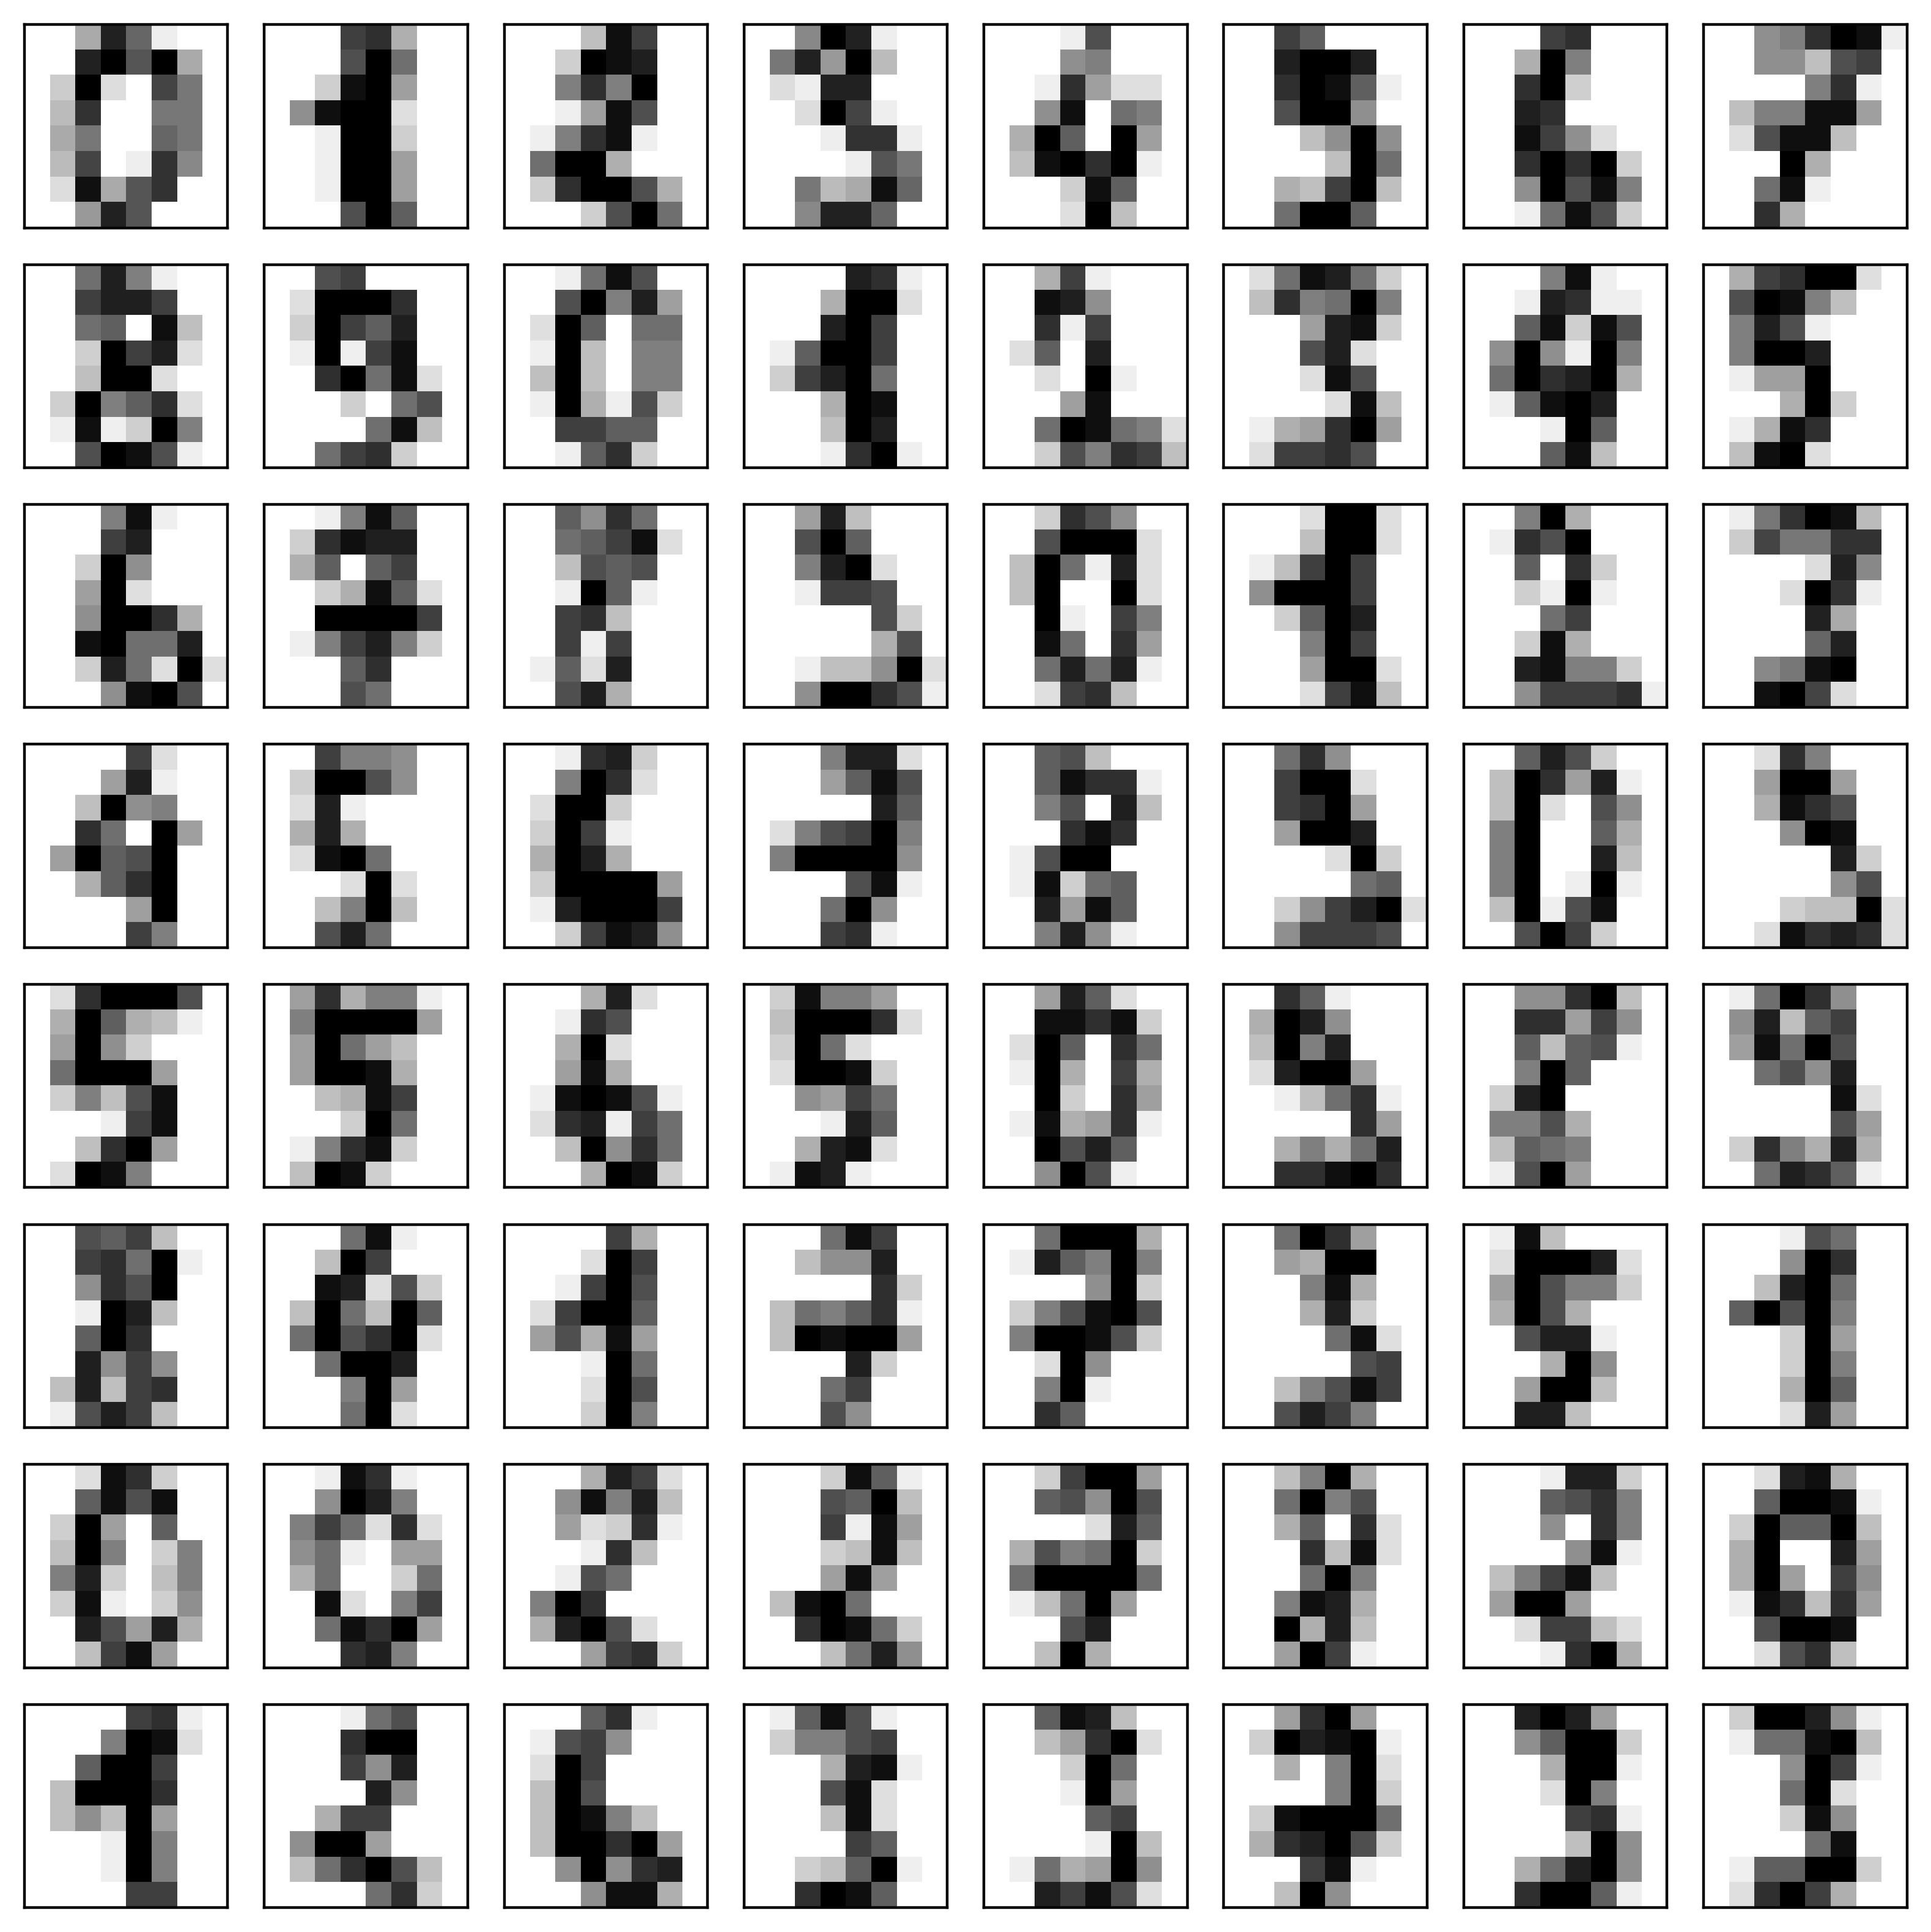

In [24]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# N·∫°p d·ªØ li·ªáu digits
digits = load_digits()

# M·ªói ·∫£nh l√† ma tr·∫≠n 8x8
fig, ax = plt.subplots(8, 8, figsize=(8, 8))

for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')  # Hi·ªÉn th·ªã ·∫£nh m·ª©c x√°m
    axi.set(xticks=[], yticks=[])                # ·∫®n tr·ª•c

plt.tight_layout()
plt.show()


ƒêo·∫°n m√£ n√†y d√πng ƒë·ªÉ hi·ªÉn th·ªã tr·ª±c quan 64 ·∫£nh ƒë·∫ßu ti√™n trong t·∫≠p d·ªØ li·ªáu digits.
C·ª• th·ªÉ, m·ªói ·∫£nh l√† m·ªôt ma tr·∫≠n 8x8 ƒëi·ªÉm ·∫£nh m·ª©c x√°m, bi·ªÉu di·ªÖn m·ªôt ch·ªØ s·ªë vi·∫øt tay t·ª´ 0 ƒë·∫øn 9.
Bi·ªÉu ƒë·ªì ƒë∆∞·ª£c s·∫Øp x·∫øp th√†nh l∆∞·ªõi 8x8, gi√∫p quan s√°t t·ªïng quan c√°c m·∫´u d·ªØ li·ªáu ƒë·∫ßu ti√™n v√† nh·∫≠n th·∫•y s·ª± kh√°c bi·ªát gi·ªØa c√°c ch·ªØ s·ªë ‚Äî v√≠ d·ª•: h√¨nh d√°ng n√©t vi·∫øt, ƒë·ªô ƒë·∫≠m nh·∫°t v√† c√°ch ph√¢n b·ªë ƒëi·ªÉm ·∫£nh.
ƒê√¢y l√† b∆∞·ªõc quan tr·ªçng ƒë·ªÉ hi·ªÉu r√µ d·ªØ li·ªáu h√¨nh ·∫£nh tr∆∞·ªõc khi x√¢y d·ª±ng m√¥ h√¨nh SVM.

##### 4. V·∫Ω m·ªôt ·∫£nh t·ª´ ma tr·∫≠n 8 x 8

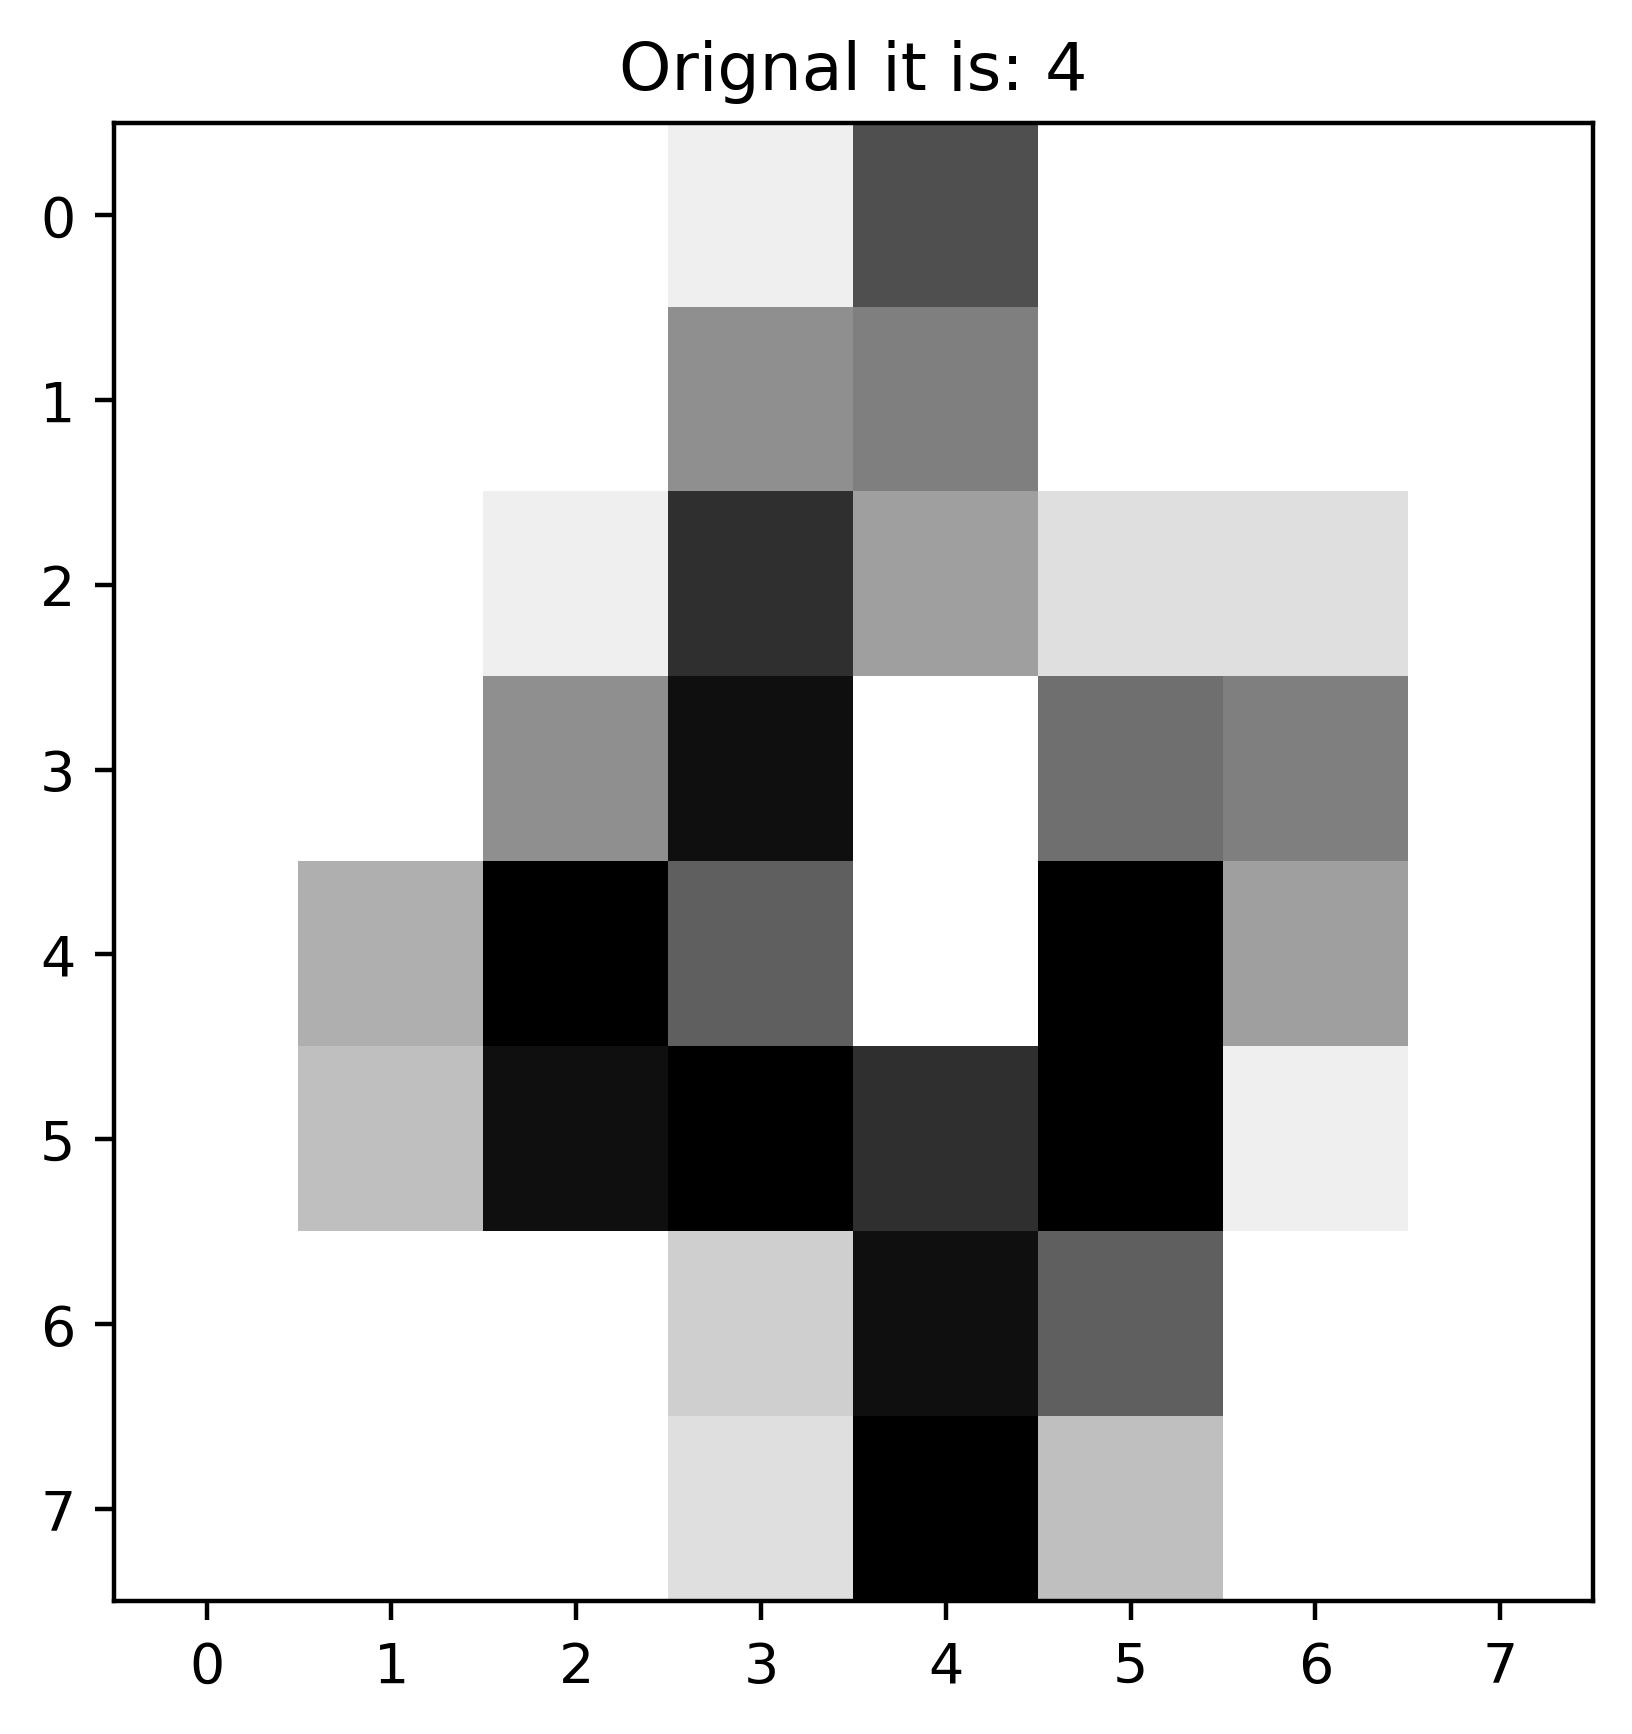

In [25]:
# H√†m v·∫Ω 1 ·∫£nh c√≥ k√≠ch th∆∞·ªõc 8 x 8 (·∫£nh l·∫•y t·ª´ ma images)
def view_digit(index):
    plt.imshow(digits.images[index] , cmap = plt.cm.gray_r)
    plt.title('Orignal it is: '+ str(digits.target[index]))
    plt.show()
# v·∫Ω ·∫£nh ·ªü v·ªã tr√≠ th·ª© 4
view_digit(4)

·∫¢nh minh h·ªça cho th·∫•y d·ªØ li·ªáu trong t·∫≠p digits ƒë∆∞·ª£c bi·ªÉu di·ªÖn d∆∞·ªõi d·∫°ng ma tr·∫≠n 8x8 pixel, m·ªói √¥ mang gi√° tr·ªã c∆∞·ªùng ƒë·ªô m·ª©c x√°m th·ªÉ hi·ªán n√©t vi·∫øt c·ªßa ch·ªØ s·ªë. H√¨nh tr√™n l√† ch·ªØ s·ªë ‚Äú4‚Äù vi·∫øt tay, ƒë∆∞·ª£c hi·ªÉn th·ªã b·∫±ng thang ƒë·ªô x√°m. Vi·ªác tr·ª±c quan h√≥a n√†y gi√∫p ta hi·ªÉu r√µ h∆°n c√°ch m√† d·ªØ li·ªáu h√¨nh ·∫£nh ƒë∆∞·ª£c m√£ h√≥a v√† s·ª≠ d·ª•ng trong qu√° tr√¨nh hu·∫•n luy·ªán m√¥ h√¨nh SVM ƒë·ªÉ nh·∫≠n d·∫°ng ch·ªØ s·ªë.

#### Nhi·ªám v·ª• 2: X√¢y d·ª±ng m√¥ h√¨nh SVM ƒë·ªÉ nh·∫≠n di·ªán ch·ªØ vi·∫øt tay t·ª´ 0 ‚Äì 9

##### 1. Chu·∫©n b·ªã d·ªØ li·ªáu v√† x√¢y d·ª±ng m√¥ h√¨nh SVM

In [45]:
# Th·ª±c hi·ªán import c√°c th∆∞ vi·ªán c·∫ßn thi·∫øt ƒë·ªÉ x√¢y d·ª±ng m√¥ h√¨nh SVM
# Th·ª±c hi·ªán b∆∞·ªõc 1 c·ªßa nhi·ªám v·ª• 1
from sklearn import svm
main_data = digits['data']
targets = digits['target']
svc = svm.SVC(gamma=0.001 , C = 100)
# GAMMA is a parameter for non linear hyperplanes.
# The higher the gamma value it tries to exactly fit the training data set
# C is the penalty parameter of the error term.
# It controls the trade off between smooth decision boundary and classifying the training points correctly.
svc.fit(main_data[:1500] , targets[:1500])
predictions = svc.predict(main_data[1501:])
# list(zip(predictions , targets[1501:]))

ƒêo·∫°n code tr√™n d√πng ƒë·ªÉ hu·∫•n luy·ªán v√† x√¢y d·ª±ng m√¥ h√¨nh SVM nh·∫±m nh·∫≠n d·∫°ng ch·ªØ s·ªë vi·∫øt tay trong t·∫≠p d·ªØ li·ªáu digits:


    N·∫°p d·ªØ li·ªáu: l·∫•y ƒë·∫∑c tr∆∞ng (main_data) v√† nh√£n (targets) t·ª´ digits.

    T·∫°o m√¥ h√¨nh: kh·ªüi t·∫°o m√¥ h√¨nh SVM v·ªõi gamma=0.001 v√† C=100, hai tham s·ªë ƒëi·ªÅu khi·ªÉn ƒë·ªô ph·ª©c t·∫°p c·ªßa m√¥ h√¨nh.

    Hu·∫•n luy·ªán: d√πng 1.500 m·∫´u ƒë·∫ßu ƒë·ªÉ hu·∫•n luy·ªán (svc.fit(...)).

    D·ª± ƒëo√°n: s·ª≠ d·ª•ng m√¥ h√¨nh ƒë√£ hu·∫•n luy·ªán ƒë·ªÉ d·ª± ƒëo√°n nh√£n cho c√°c m·∫´u c√≤n l·∫°i (svc.predict(...)).

M·ª•c ti√™u l√† gi√∫p m√¥ h√¨nh h·ªçc c√°ch ph√¢n bi·ªát c√°c ch·ªØ s·ªë (0‚Äì9) d·ª±a tr√™n ƒë·∫∑c tr∆∞ng c·ªßa t·ª´ng ·∫£nh vi·∫øt tay.

##### 2. ƒê√°nh gi√° hi·ªáu qu·∫£ c·ªßa m√¥ h√¨nh v·ªõi Confusion Matrix

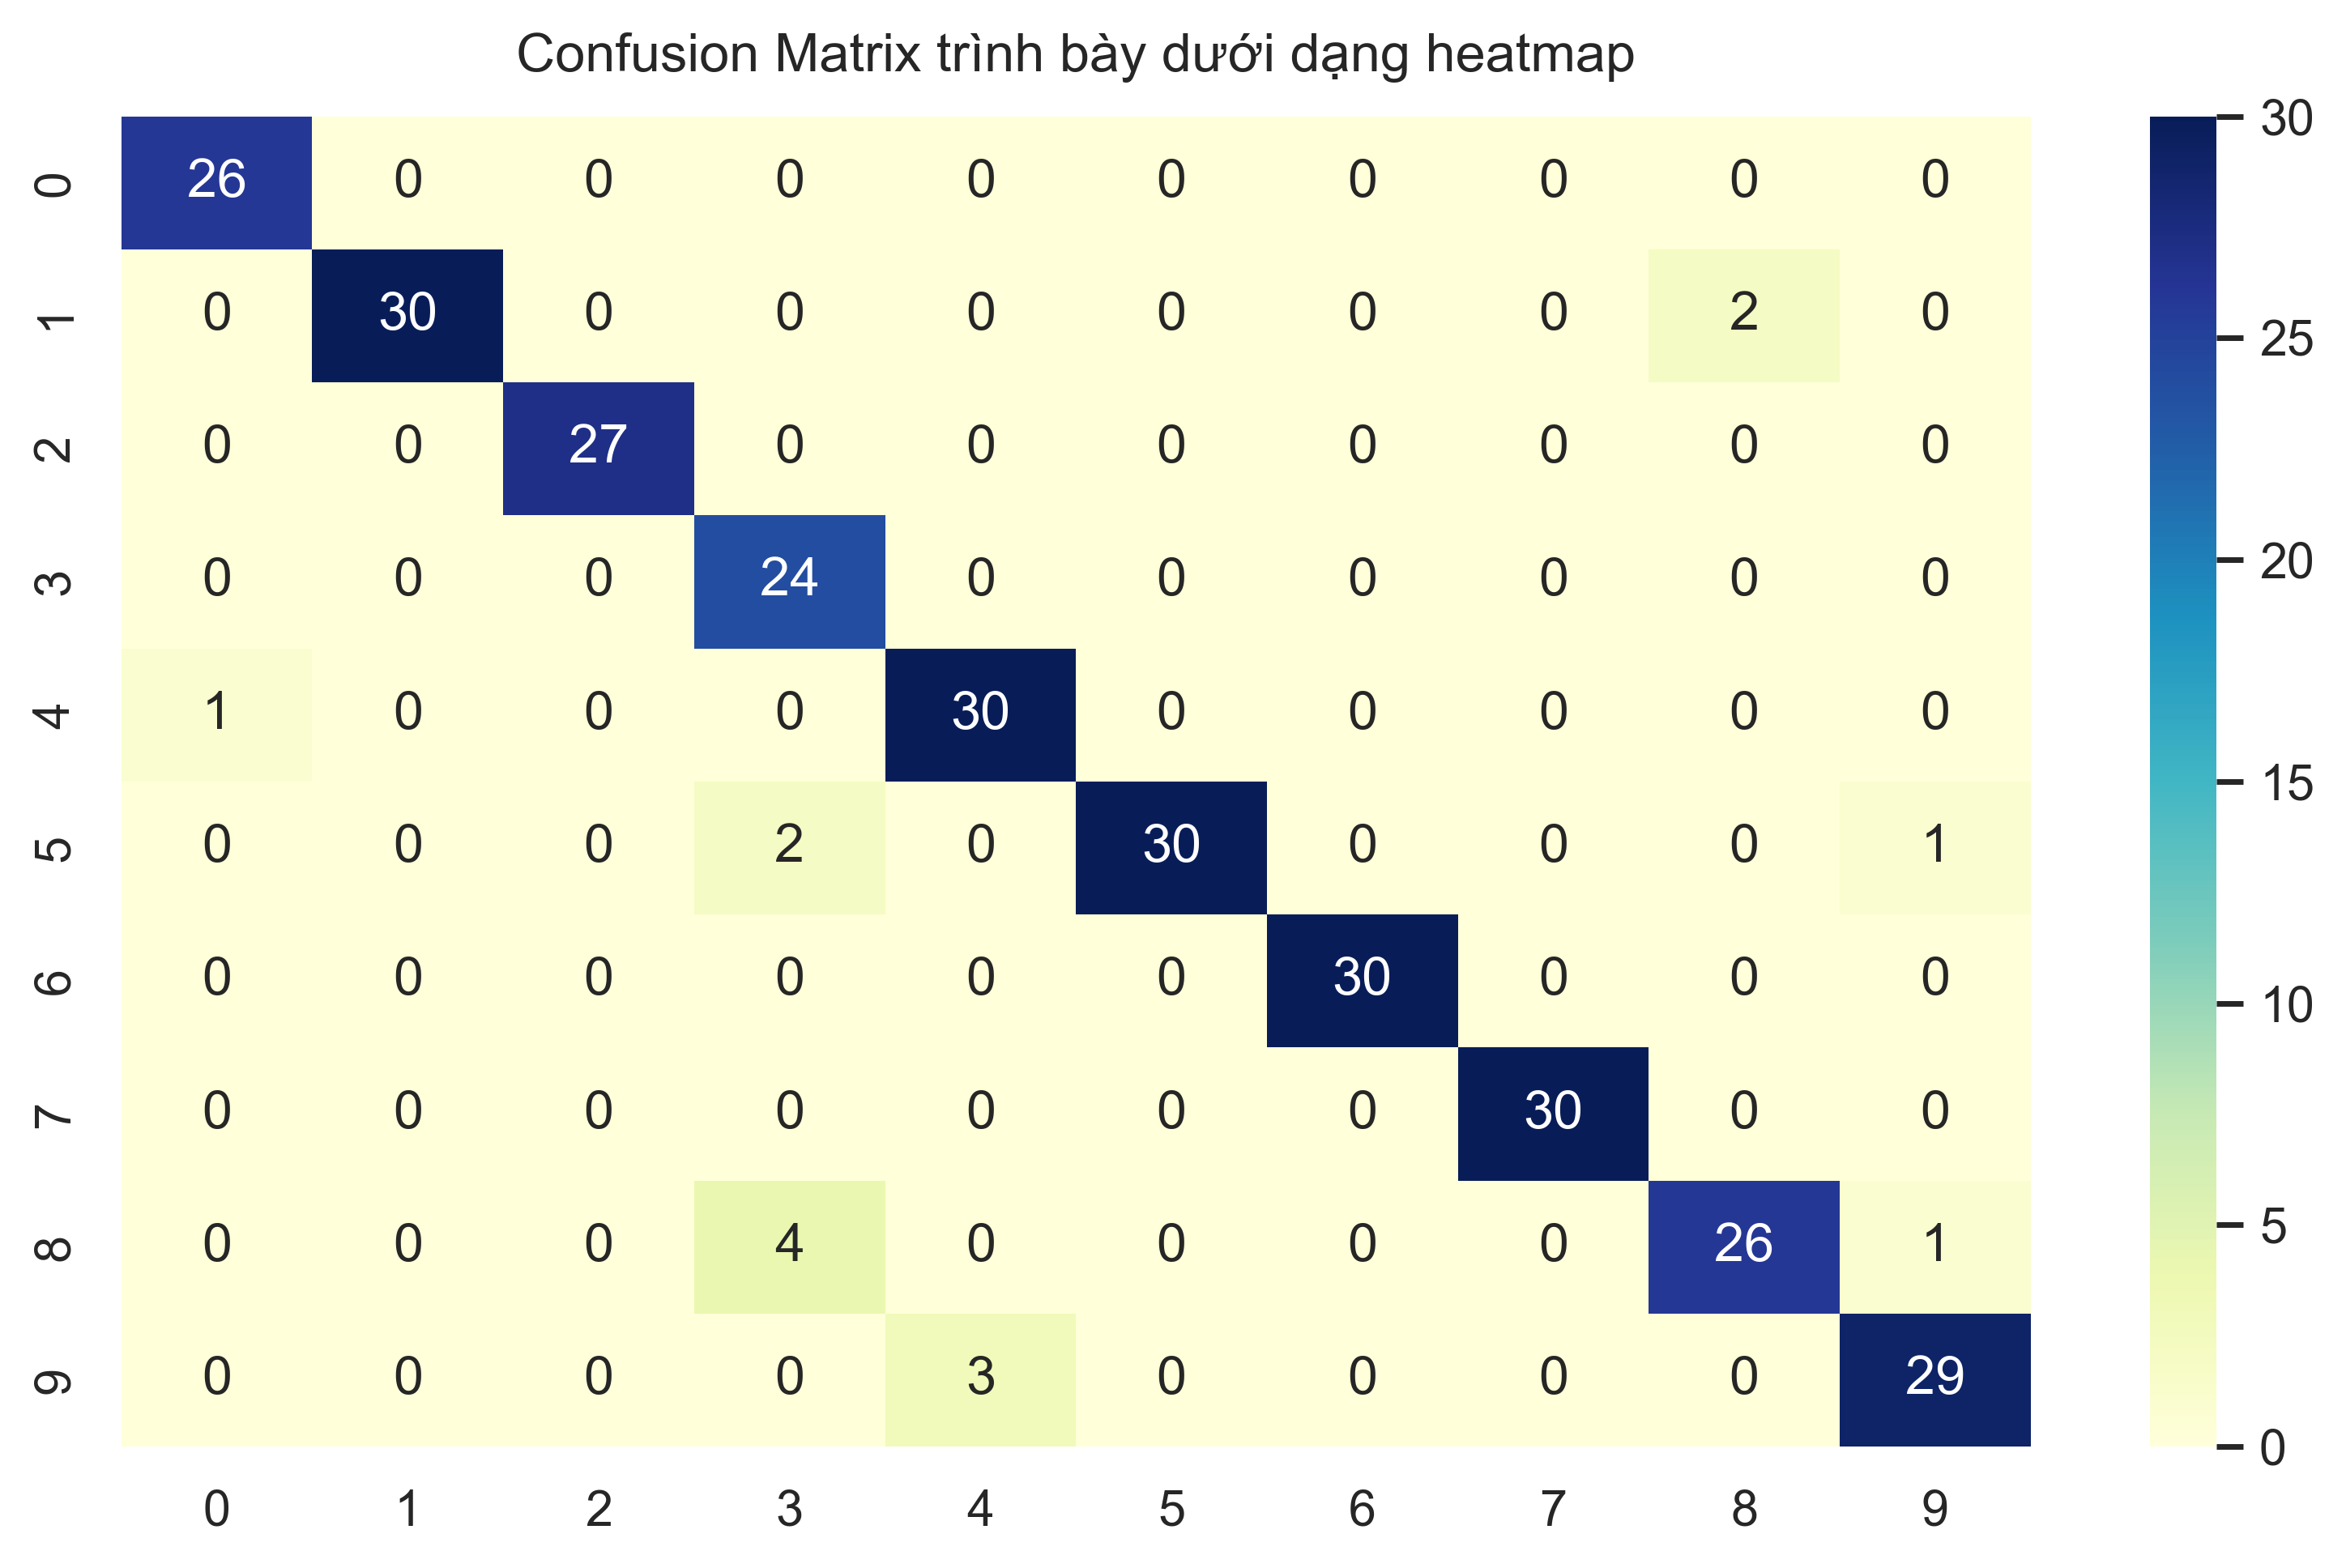

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# T·∫°o confusion matrix
cm = confusion_matrix(predictions, targets[1501:])

# ƒê∆∞a v·ªÅ DataFrame
conf_matrix = pd.DataFrame(data=cm)

# Thi·∫øt l·∫≠p giao di·ªán v√† ki·ªÉu hi·ªÉn th·ªã
sns.set(font_scale=1.0)
sns.set_style("dark")

# V·∫Ω heatmap
plt.figure(figsize=(8, 5))
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=True)

# Th√™m ti√™u ƒë·ªÅ v√† ƒë·ªãnh d·∫°ng
plt.title("Confusion Matrix tr√¨nh b√†y d∆∞·ªõi d·∫°ng heatmap", fontsize=12, pad=10)
plt.xlabel("")
plt.ylabel("")

plt.tight_layout()

# Ch·ªâ g·ªçi plt.show() M·ªòT L·∫¶N, sau c√πng
plt.show()

# Kh√¥ng ƒë·ªÉ cell k·∫øt th√∫c b·∫±ng m·ªôt ƒë·ªëi t∆∞·ª£ng (vd. 'conf_matrix' ho·∫∑c 'ax')
# => tr√°nh Jupyter t·ª± hi·ªÉn th·ªã l·∫°i ma tr·∫≠n th·ª© 2


Bi·ªÉu ƒë·ªì Confusion Matrix cho th·∫•y ph·∫ßn l·ªõn c√°c gi√° tr·ªã n·∫±m tr√™n ƒë∆∞·ªùng ch√©o ch√≠nh, nghƒ©a l√† m√¥ h√¨nh SVM d·ª± ƒëo√°n ƒë√∫ng h·∫ßu h·∫øt c√°c ch·ªØ s·ªë vi·∫øt tay. M·ªôt s·ªë √¥ ngo√†i ƒë∆∞·ªùng ch√©o v·∫´n c√≥ gi√° tr·ªã nh·ªè, th·ªÉ hi·ªán c√°c tr∆∞·ªùng h·ª£p nh·∫ßm l·∫´n gi·ªØa c√°c ch·ªØ s·ªë c√≥ h√¨nh d·∫°ng t∆∞∆°ng t·ª±, ch·∫≥ng h·∫°n nh∆∞ ‚Äú8‚Äù v√† ‚Äú9‚Äù ho·∫∑c ‚Äú3‚Äù v√† ‚Äú5‚Äù.

Nh√¨n chung, m√¥ h√¨nh ƒë·∫°t ƒë·ªô ch√≠nh x√°c cao, ph·∫£n √°nh kh·∫£ nƒÉng h·ªçc v√† ph√¢n bi·ªát t·ªët c·ªßa SVM tr√™n b·ªô d·ªØ li·ªáu MNIST. K·∫øt qu·∫£ n√†y c≈©ng cho th·∫•y vi·ªác l·ª±a ch·ªçn tham s·ªë gamma=0.001 v√† C=100 l√† ph√π h·ª£p, gi√∫p c√¢n b·∫±ng gi·ªØa vi·ªác kh·ªõp d·ªØ li·ªáu hu·∫•n luy·ªán v√† kh·∫£ nƒÉng t·ªïng qu√°t h√≥a tr√™n d·ªØ li·ªáu ki·ªÉm th·ª≠.

##### 3. In k·∫øt qu·∫£ d·∫°ng vƒÉn b·∫£n

In [34]:
from sklearn.metrics import classification_report
print(classification_report(predictions, targets[1501:]))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      0.94      0.97        32
           2       1.00      1.00      1.00        27
           3       0.80      1.00      0.89        24
           4       0.91      0.97      0.94        31
           5       1.00      0.91      0.95        33
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        30
           8       0.93      0.84      0.88        31
           9       0.94      0.91      0.92        32

    accuracy                           0.95       296
   macro avg       0.95      0.96      0.95       296
weighted avg       0.96      0.95      0.95       296



B·∫£ng classification report cho th·∫•y m√¥ h√¨nh SVM ƒë·∫°t hi·ªáu su·∫•t r·∫•t cao tr√™n h·∫ßu h·∫øt c√°c l·ªõp ch·ªØ s·ªë. C√°c ch·ªâ s·ªë precision, recall v√† f1-score ƒë·ªÅu dao ƒë·ªông quanh m·ª©c 0.95 ‚Äì 1.00, ch·ª©ng t·ªè m√¥ h√¨nh d·ª± ƒëo√°n ch√≠nh x√°c v√† c√¢n b·∫±ng gi·ªØa vi·ªác nh·∫≠n di·ªán ƒë√∫ng (recall) v√† tr√°nh nh·∫ßm l·∫´n (precision).

M·ªôt s·ªë l·ªõp nh∆∞ s·ªë 2, 6, 7 ƒë·∫°t ƒë·ªô ch√≠nh x√°c tuy·ªát ƒë·ªëi (1.00), trong khi c√°c l·ªõp nh∆∞ 3, 8, 9 c√≥ f1-score th·∫•p h∆°n m·ªôt ch√∫t do xu·∫•t hi·ªán m·ªôt v√†i tr∆∞·ªùng h·ª£p nh·∫ßm l·∫´n.

T·ªïng th·ªÉ, ƒë·ªô ch√≠nh x√°c to√†n m√¥ h√¨nh (accuracy = 0.95) ch·ª©ng minh r·∫±ng SVM ho·∫°t ƒë·ªông hi·ªáu qu·∫£ trong vi·ªác nh·∫≠n d·∫°ng ch·ªØ s·ªë vi·∫øt tay, th·ªÉ hi·ªán kh·∫£ nƒÉng ph√¢n lo·∫°i t·ªët v√† ƒë·ªô ·ªïn ƒë·ªãnh cao tr√™n t·∫≠p d·ªØ li·ªáu MNIST.